In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('D:/study/AI ML DataScience/Freecodecamp Python course/covid_19_data.csv')

In [3]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [6]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [7]:
df.head()

ObservationDate Province/State  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [9]:
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [10]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [18]:
df.describe()

Date     Confirmed         Deaths  \
count                         205951  2.059510e+05  205951.000000   
mean   2020-08-31 05:58:00.542459136  4.540148e+04    1262.633850   
min              2020-01-22 00:00:00 -3.028440e+05    -178.000000   
25%              2020-06-27 00:00:00  5.960000e+02       7.000000   
50%              2020-09-05 00:00:00  5.361000e+03     101.000000   
75%              2020-11-13 00:00:00  2.618400e+04     713.000000   
max              2021-01-19 00:00:00  3.049037e+06   80143.000000   
std                              NaN  1.437216e+05    4082.838603   

          Recovered  
count  2.059510e+05  
mean   2.766348e+04  
min   -8.544050e+05  
25%    1.100000e+01  
50%    1.028000e+03  
75%    9.880000e+03  
max    6.399531e+06  
std    1.334517e+05

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       205951 non-null  datetime64[ns]
 1   State      150571 non-null  object        
 2   Country    205951 non-null  object        
 3   Confirmed  205951 non-null  float64       
 4   Deaths     205951 non-null  float64       
 5   Recovered  205951 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.4+ MB


In [25]:
df['State']=df['State'].fillna(value='NA')

In [26]:
df.head(50)

Date           State         Country  Confirmed  Deaths  Recovered
0  2020-01-22           Anhui  Mainland China        1.0     0.0        0.0
1  2020-01-22         Beijing  Mainland China       14.0     0.0        0.0
2  2020-01-22       Chongqing  Mainland China        6.0     0.0        0.0
3  2020-01-22          Fujian  Mainland China        1.0     0.0        0.0
4  2020-01-22           Gansu  Mainland China        0.0     0.0        0.0
5  2020-01-22       Guangdong  Mainland China       26.0     0.0        0.0
6  2020-01-22         Guangxi  Mainland China        2.0     0.0        0.0
7  2020-01-22         Guizhou  Mainland China        1.0     0.0        0.0
8  2020-01-22          Hainan  Mainland China        4.0     0.0        0.0
9  2020-01-22           Hebei  Mainland China        1.0     0.0        0.0
10 2020-01-22    Heilongjiang  Mainland China        0.0     0.0        0.0
11 2020-01-22           Henan  Mainland China        5.0     0.0        0.0
12 2020-01-22       Hong Kong       Hong Kong        0.0     0.0        0.0
13 2020-01-22           Hubei  Mainland China      444.0    17.0       28.0
14 2020-01-22           Hunan  Mainland China        4.0     0.0        0.0
15 2020-01-22  Inner Mongolia  Mainland China        0.0     0.0        0.0
16 2020-01-22         Jiangsu  Mainland China        1.0     0.0        0.0
17 2020-01-22         Jiangxi  Mainland China        2.0     0.0        0.0
18 2020-01-22           Jilin  Mainland China        0.0     0.0        0.0
19 2020-01-22        Liaoning  Mainland China        2.0     0.0        0.0
20 2020-01-22           Macau           Macau        1.0     0.0        0.0
21 2020-01-22         Ningxia  Mainland China        1.0     0.0        0.0
22 2020-01-22         Qinghai  Mainland China        0.0     0.0        0.0
23 2020-01-22         Shaanxi  Mainland China        0.0     0.0        0.0
24 2020-01-22        Shandong  Mainland China        2.0     0.0        0.0
25 2020-01-22        Shanghai  Mainland China        9.0     0.0        0.0
26 2020-01-22          Shanxi  Mainland China        1.0     0.0        0.0
27 2020-01-22         Sichuan  Mainland China        5.0     0.0        0.0
28 2020-01-22          Taiwan          Taiwan        1.0     0.0        0.0
29 2020-01-22         Tianjin  Mainland China        4.0     0.0        0.0
30 2020-01-22           Tibet  Mainland China        0.0     0.0        0.0
31 2020-01-22      Washington              US        1.0     0.0        0.0
32 2020-01-22        Xinjiang  Mainland China        0.0     0.0        0.0
33 2020-01-22          Yunnan  Mainland China        1.0     0.0        0.0
34 2020-01-22        Zhejiang  Mainland China       10.0     0.0        0.0
35 2020-01-22              NA           Japan        2.0     0.0        0.0
36 2020-01-22              NA        Thailand        4.0     0.0        2.0
37 2020-01-22              NA     South Korea        1.0     0.0        0.0
38 2020-01-23           Anhui  Mainland China        9.0     0.0        0.0
39 2020-01-23         Beijing  Mainland China       22.0     0.0        0.0
40 2020-01-23       Chongqing  Mainland China        9.0     0.0        0.0
41 2020-01-23          Fujian  Mainland China        5.0     0.0        0.0
42 2020-01-23           Gansu  Mainland China        2.0     0.0        0.0
43 2020-01-23       Guangdong  Mainland China       32.0     0.0        2.0
44 2020-01-23         Guangxi  Mainland China        5.0     0.0        0.0
45 2020-01-23         Guizhou  Mainland China        3.0     0.0        0.0
46 2020-01-23          Hainan  Mainland China        5.0     0.0        0.0
47 2020-01-23           Hubei  Mainland China      444.0    17.0       28.0
48 2020-01-23    Heilongjiang  Mainland China        2.0     0.0        0.0
49 2020-01-23           Henan  Mainland China        5.0     0.0        0.0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       205951 non-null  datetime64[ns]
 1   State      205951 non-null  object        
 2   Country    205951 non-null  object        
 3   Confirmed  205951 non-null  float64       
 4   Deaths     205951 non-null  float64       
 5   Recovered  205951 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.4+ MB


In [33]:
df2 = df.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
df2

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28        1.0     0.0        0.0
1                     ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2                         Afghanistan 2020-02-24        1.0     0.0        0.0
3                         Afghanistan 2020-02-25        1.0     0.0        0.0
4                         Afghanistan 2020-02-26        1.0     0.0        0.0
...                               ...        ...        ...     ...        ...
61515  occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
61516  occupied Palestinian territory 2020-03-14        0.0     0.0        0.0
61517  occupied Palestinian territory 2020-03-15        0.0     0.0        0.0
61518  occupied Palestinian territory 2020-03-16        0.0     0.0        0.0
61519  occupied Palestinian territory 2020-03-17        0.0     0.0        0.0

[61520 rows x 5 columns]

In [34]:
df3 = df2[df2['Confirmed']>100]
df3

Country       Date  Confirmed  Deaths  Recovered
35     Afghanistan 2020-03-28      107.0     4.0        2.0
36     Afghanistan 2020-03-29      118.0     4.0        2.0
37     Afghanistan 2020-03-30      146.0     4.0        2.0
38     Afghanistan 2020-03-31      175.0     4.0        5.0
39     Afghanistan 2020-04-01      197.0     4.0        5.0
...            ...        ...        ...     ...        ...
61508     Zimbabwe 2021-01-15    26109.0   666.0    15414.0
61509     Zimbabwe 2021-01-16    26881.0   683.0    15872.0
61510     Zimbabwe 2021-01-17    27203.0   713.0    16512.0
61511     Zimbabwe 2021-01-18    27892.0   773.0    17372.0
61512     Zimbabwe 2021-01-19    28675.0   825.0    18110.0

[51222 rows x 5 columns]

In [35]:
countries = df['Country'].unique()
len(countries)

226

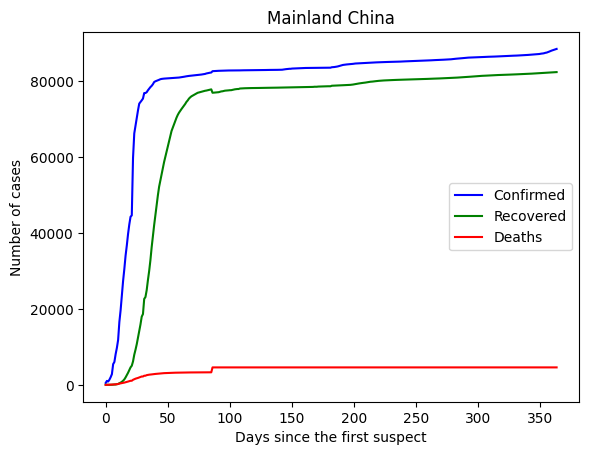

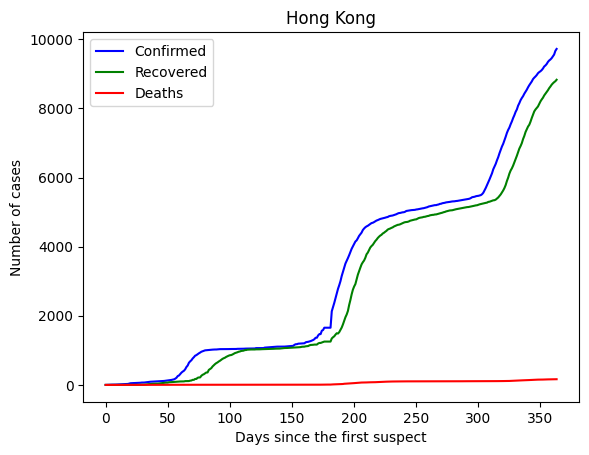

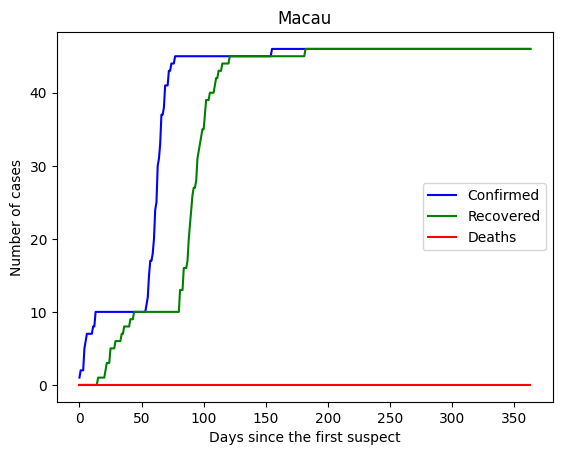

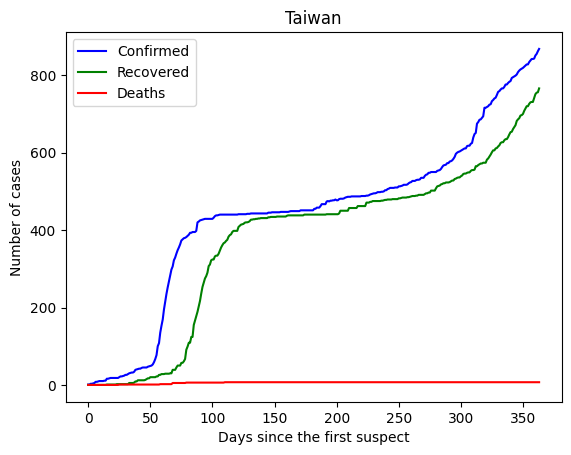

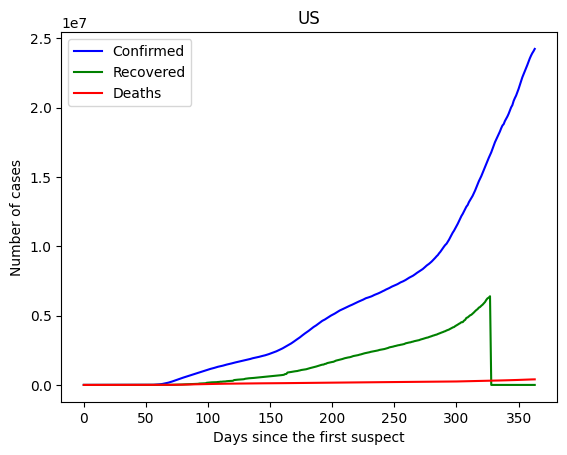

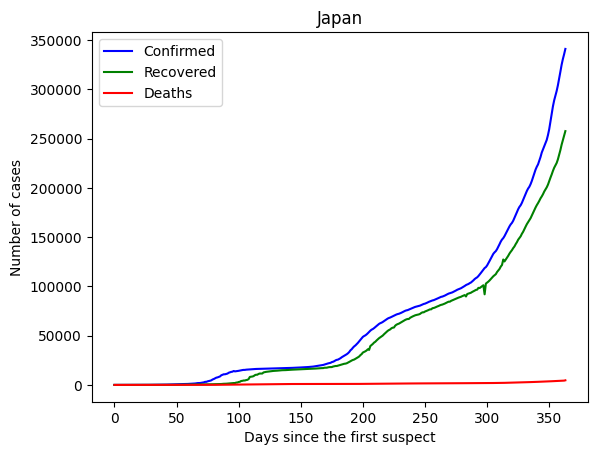

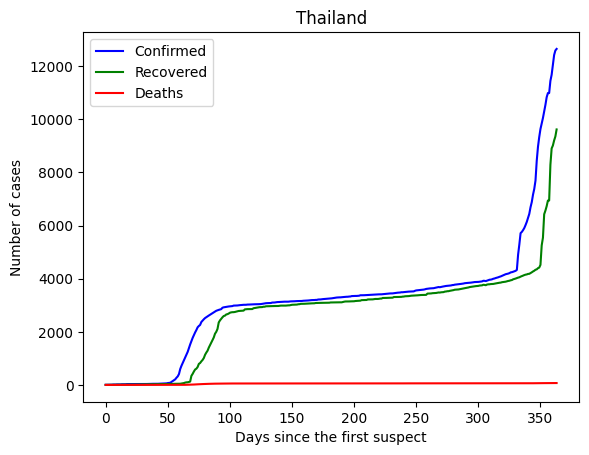

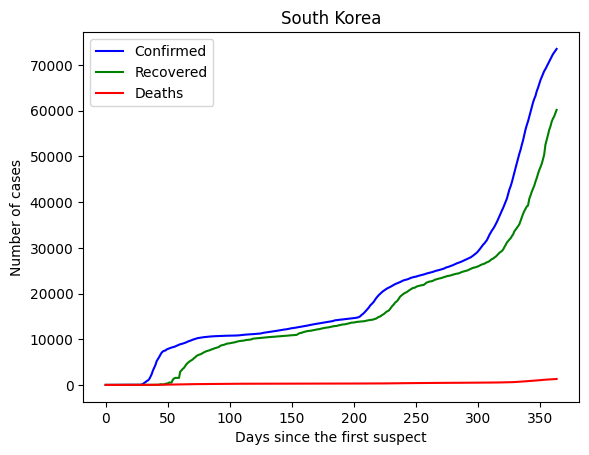

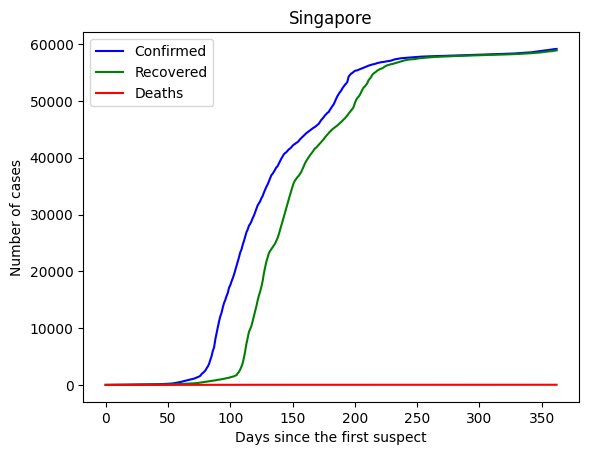

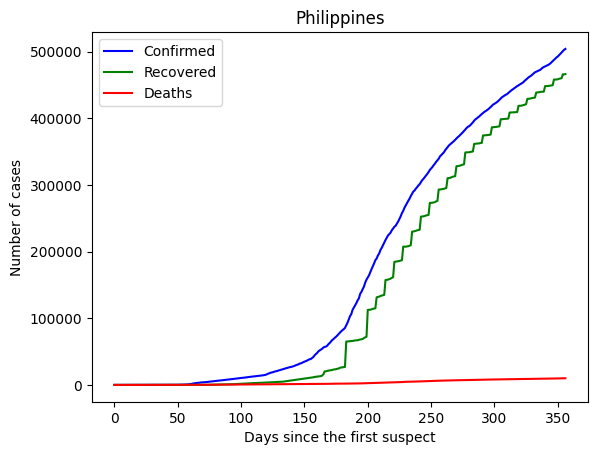

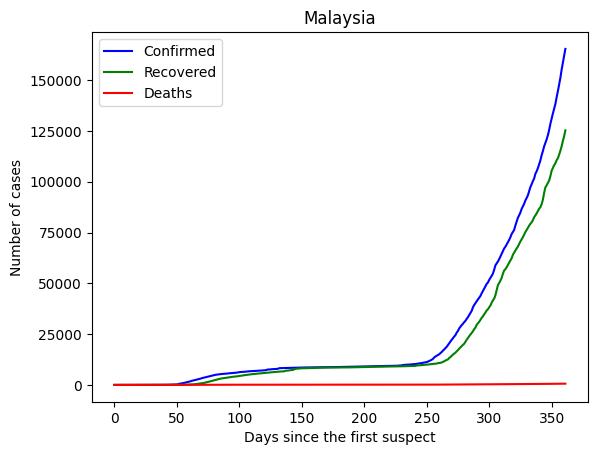

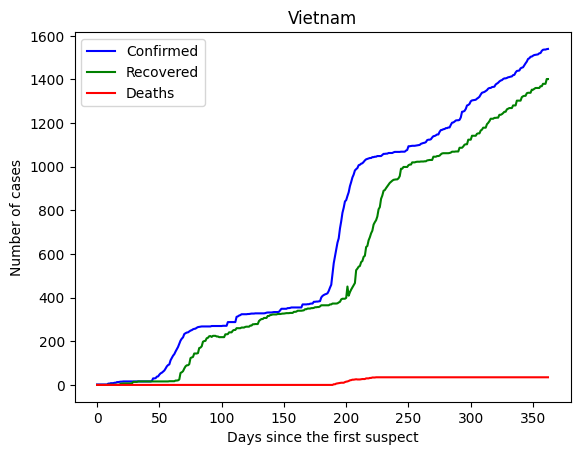

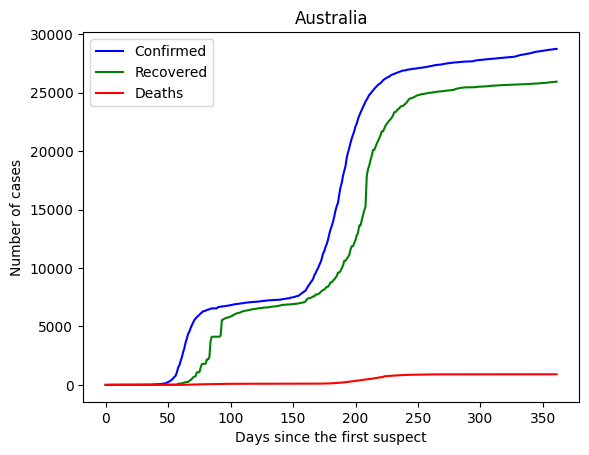

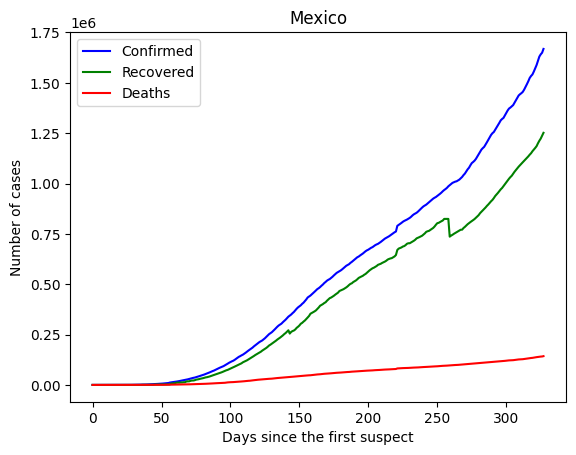

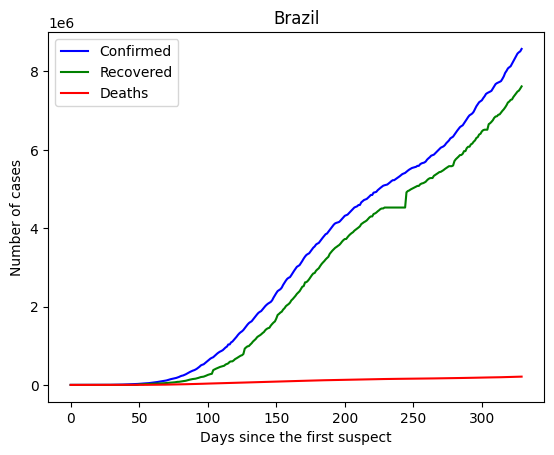

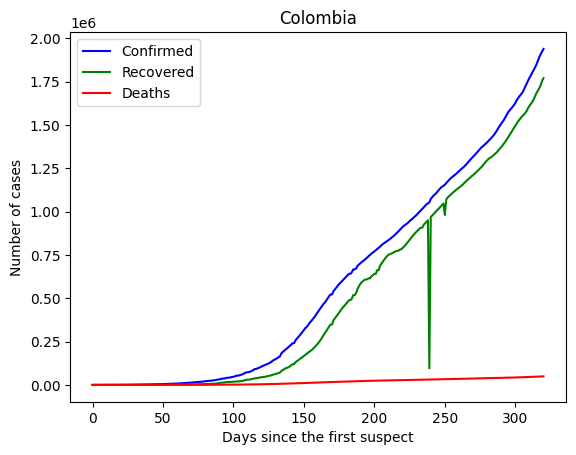

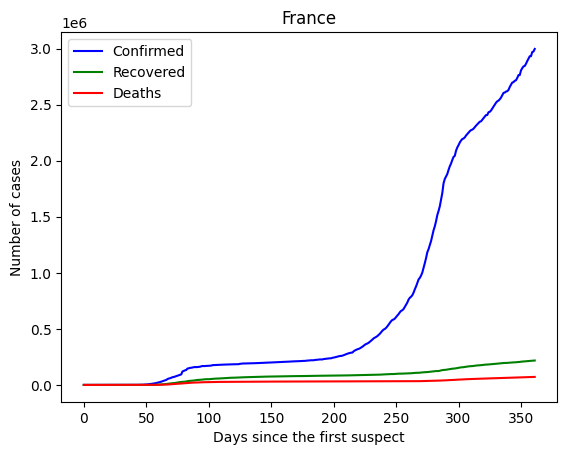

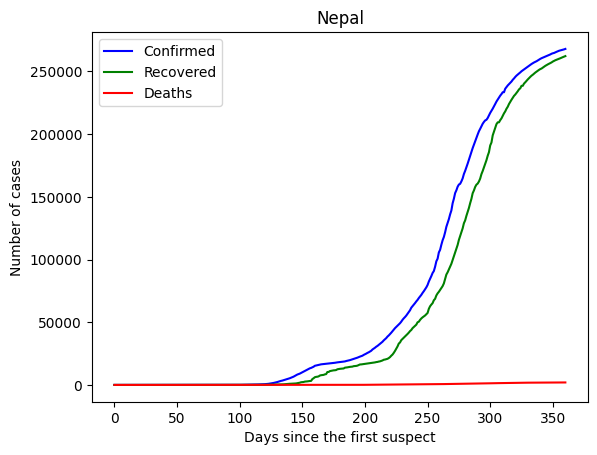

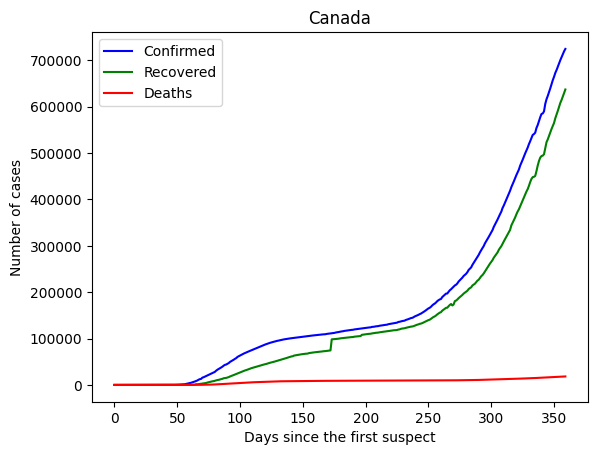

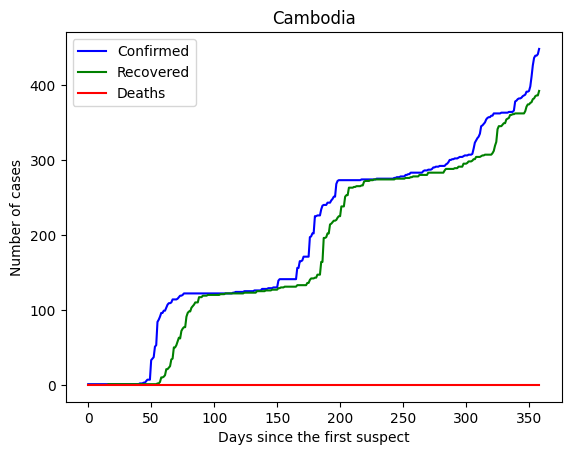

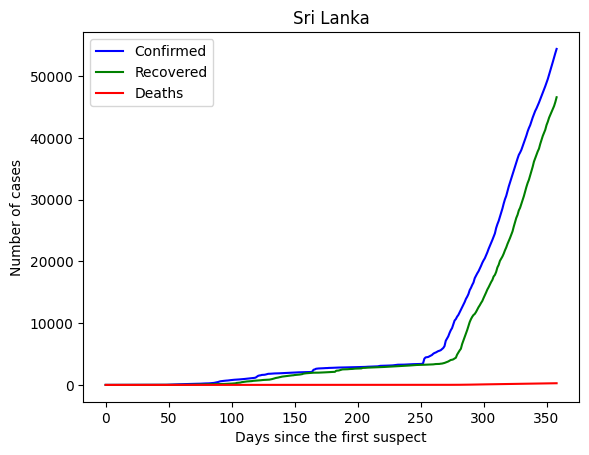

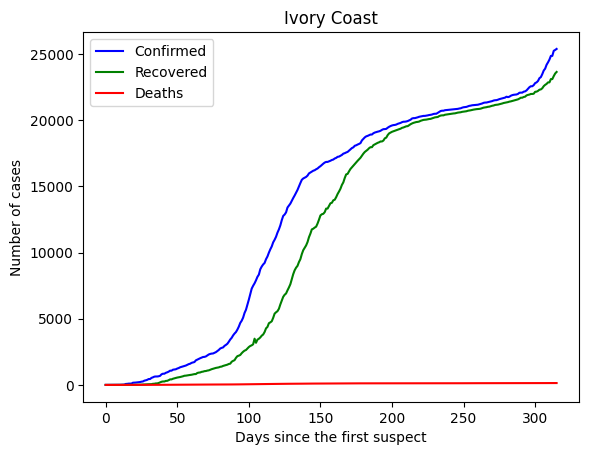

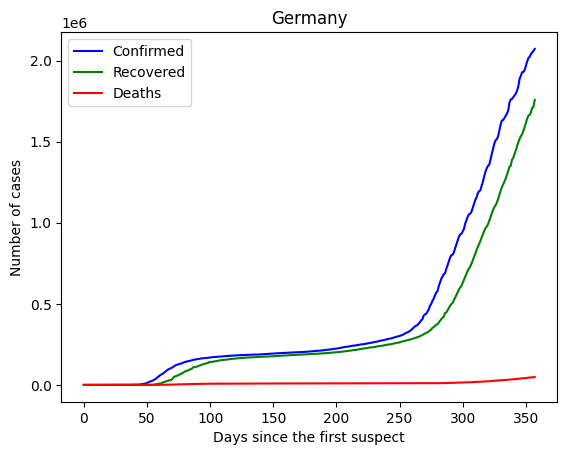

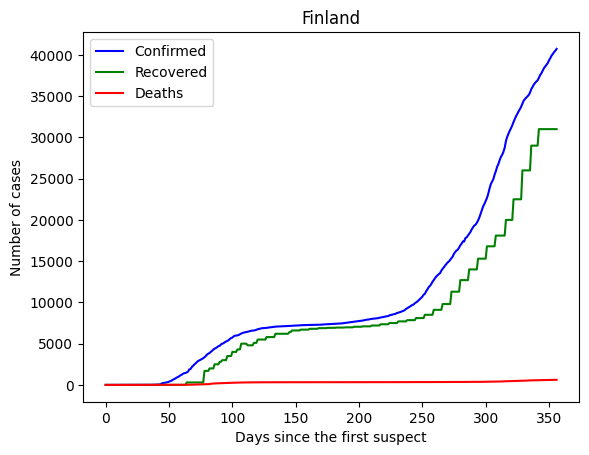

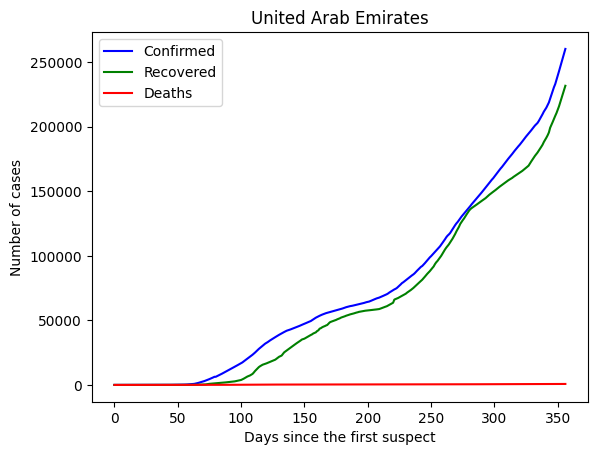

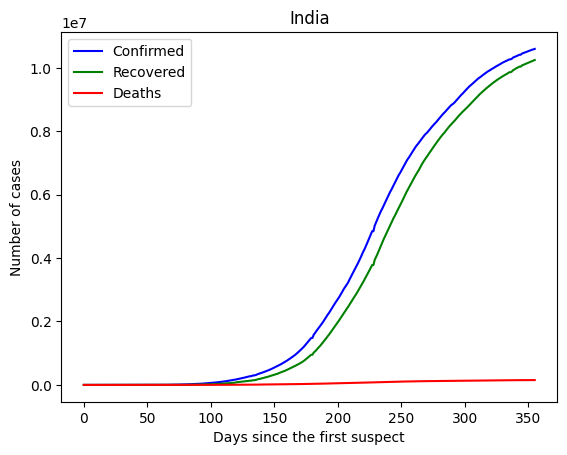

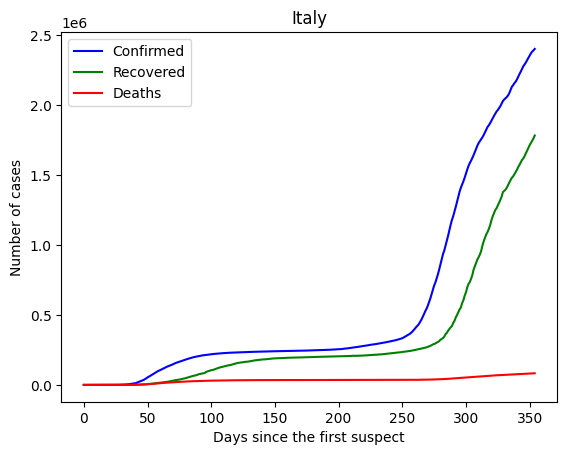

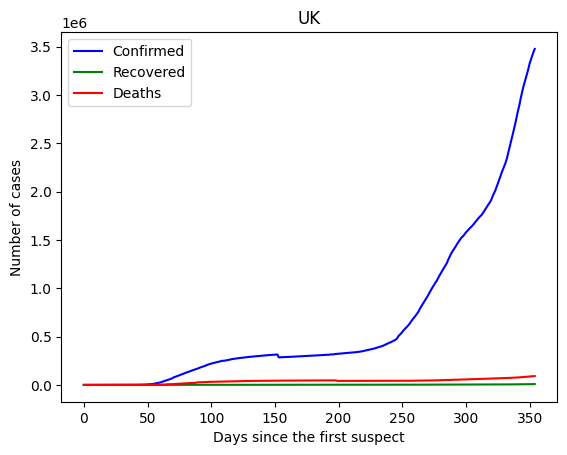

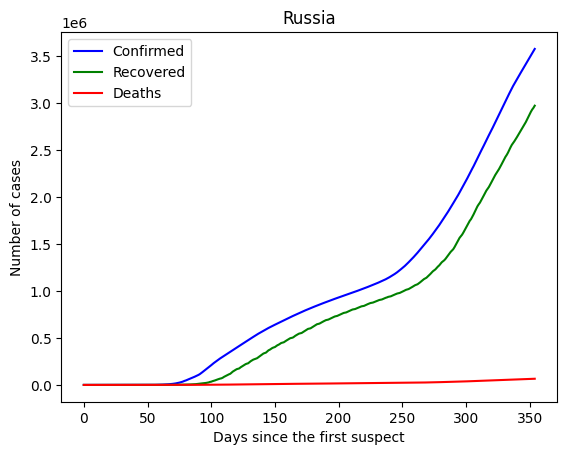

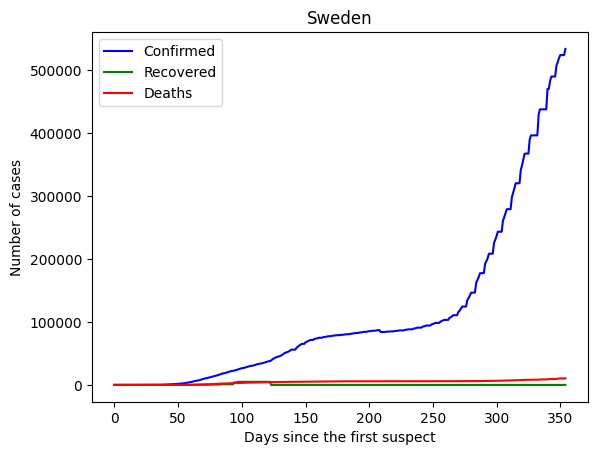

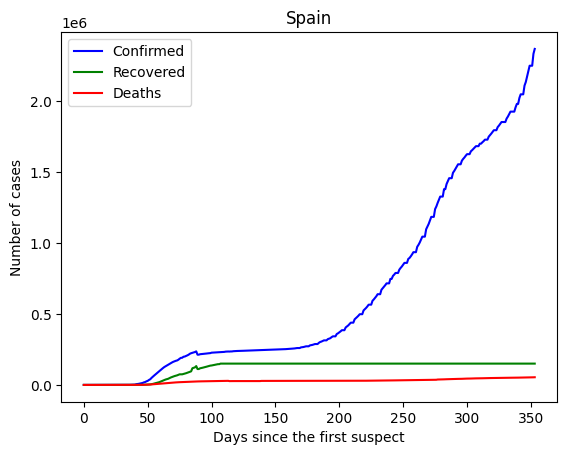

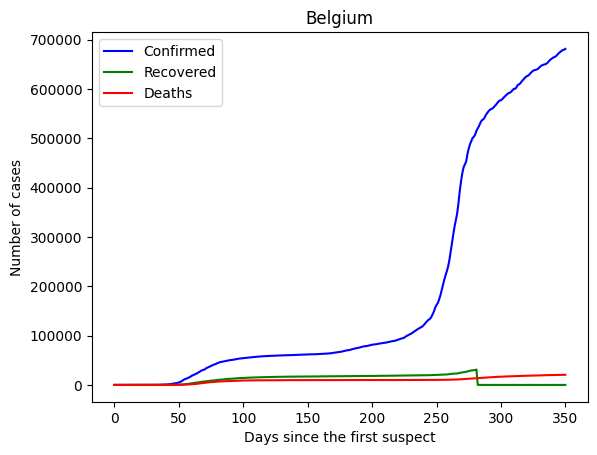

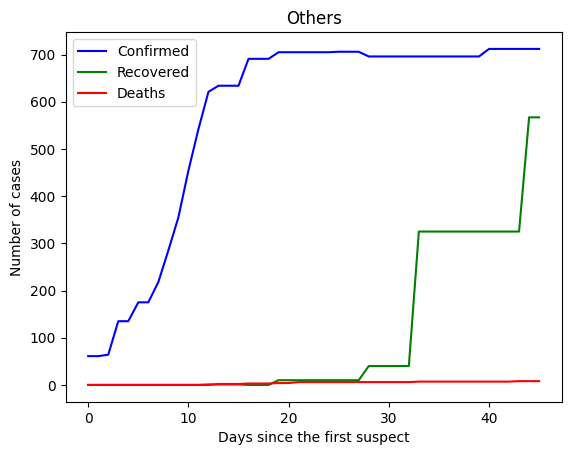

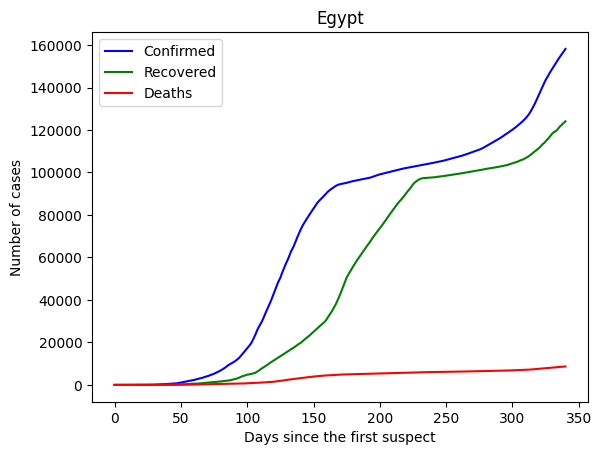

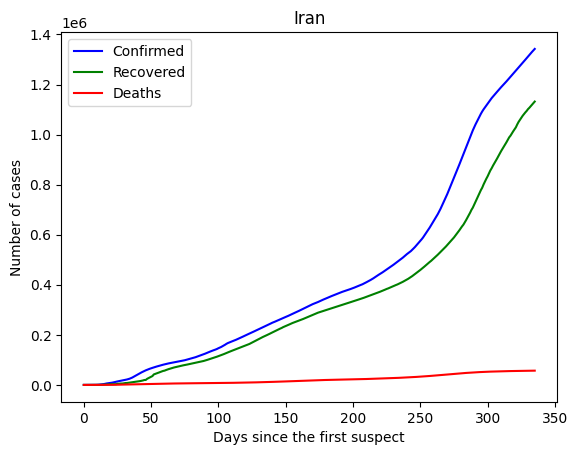

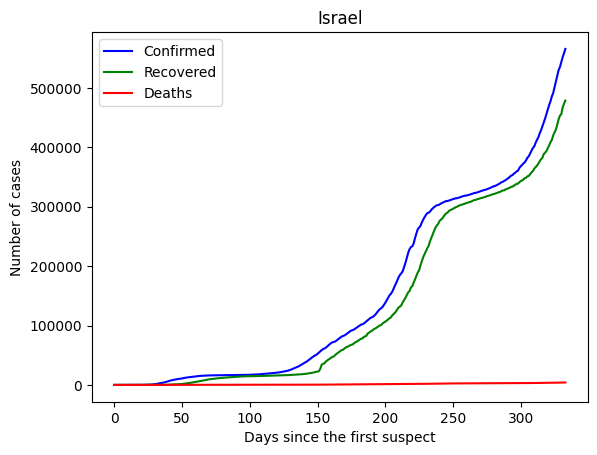

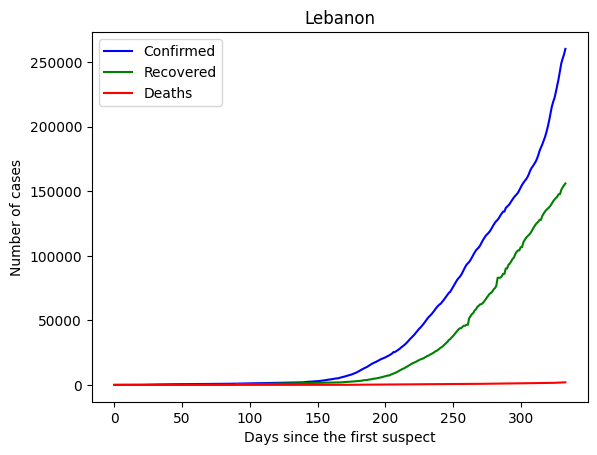

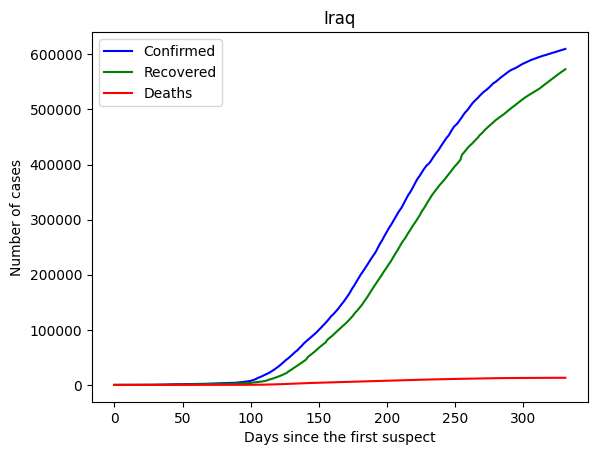

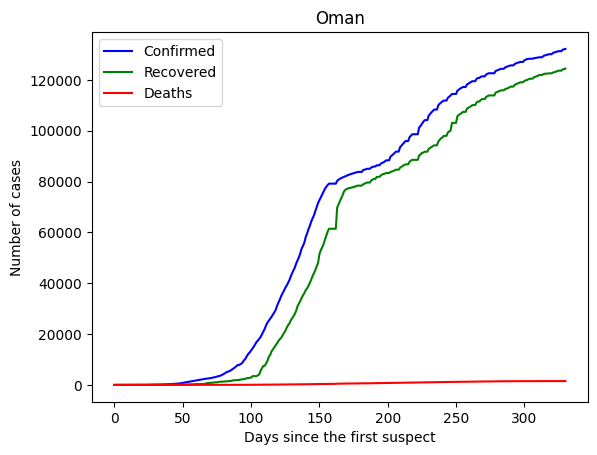

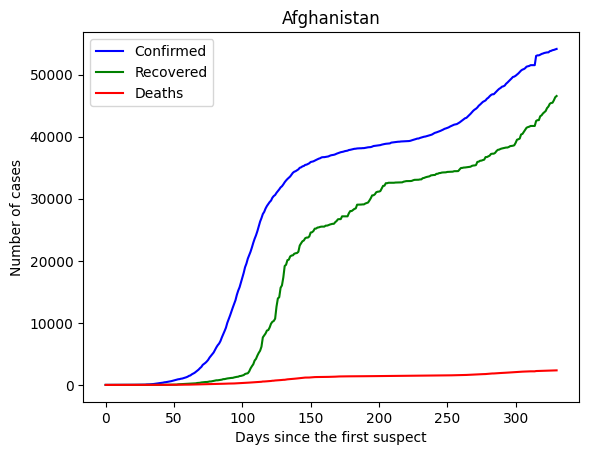

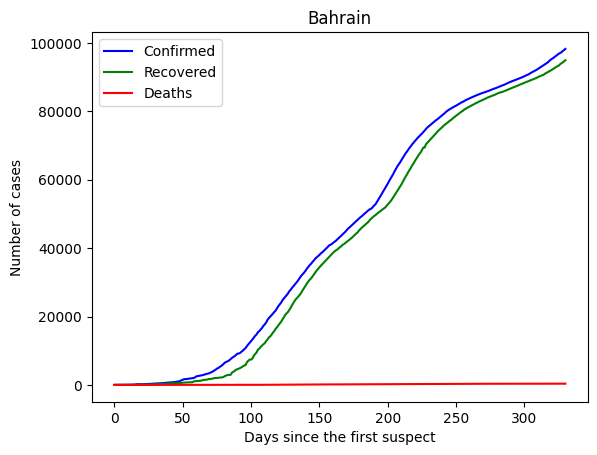

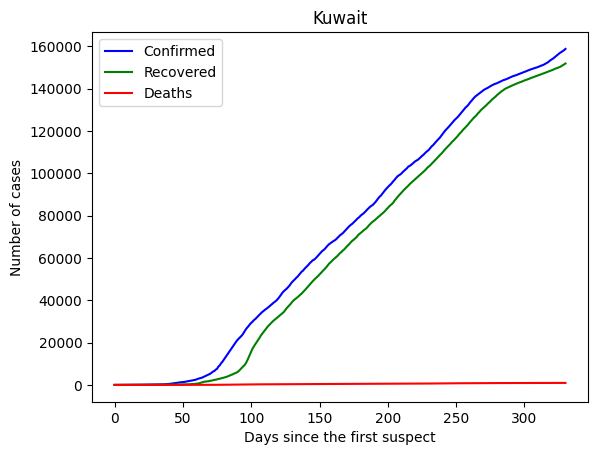

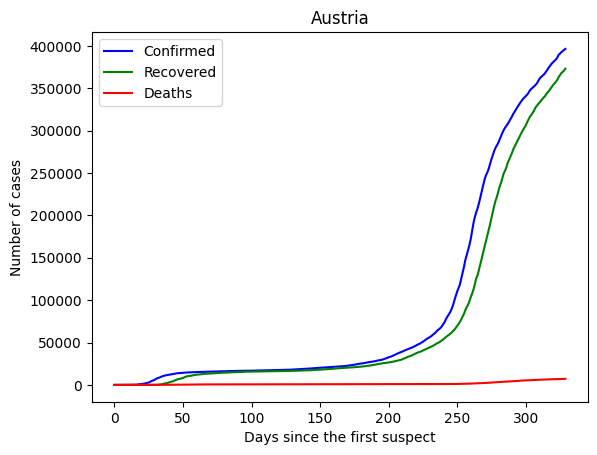

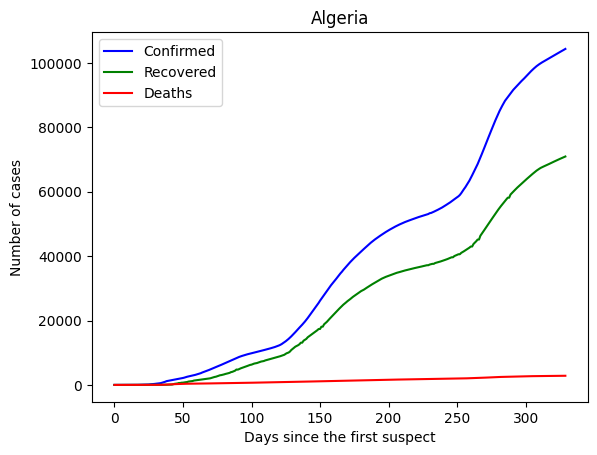

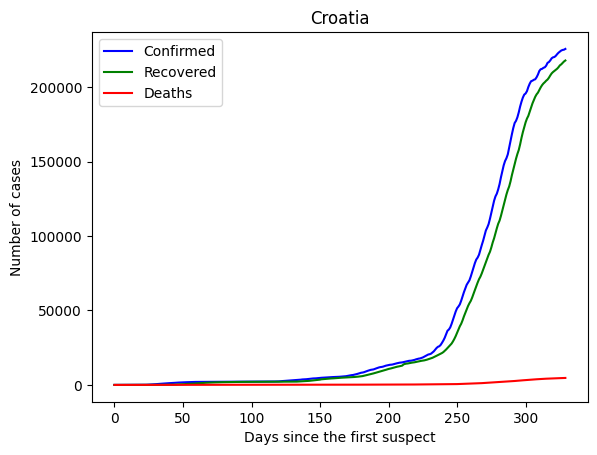

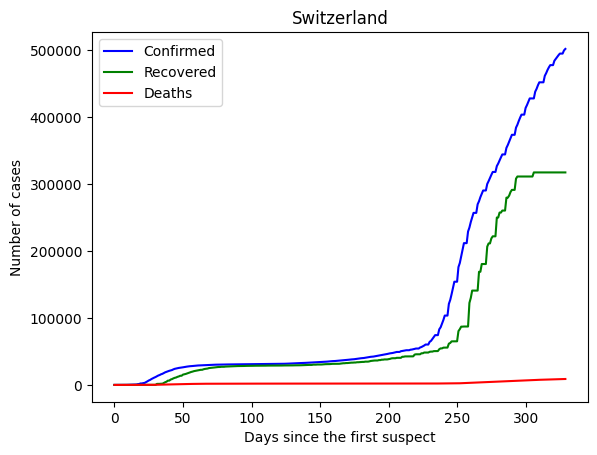

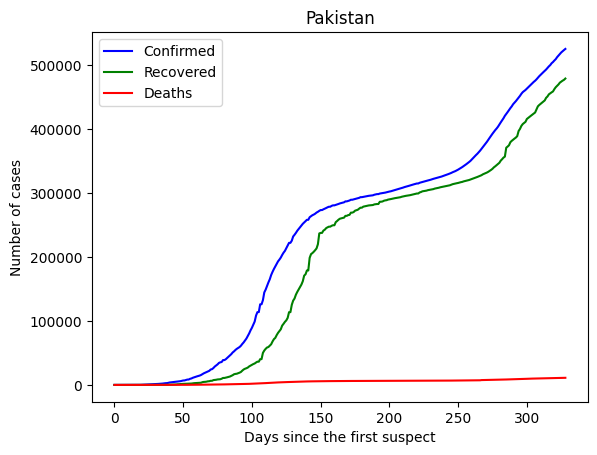

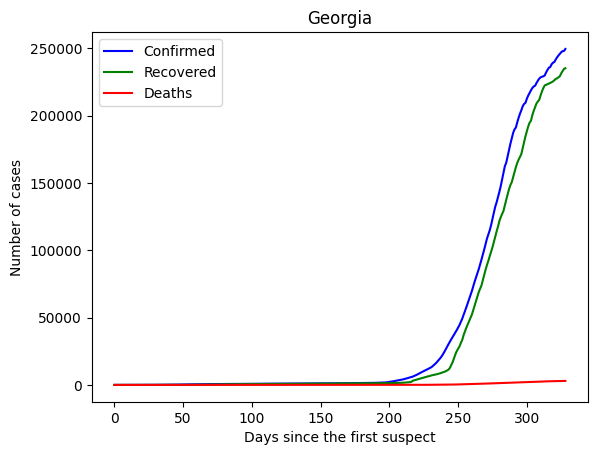

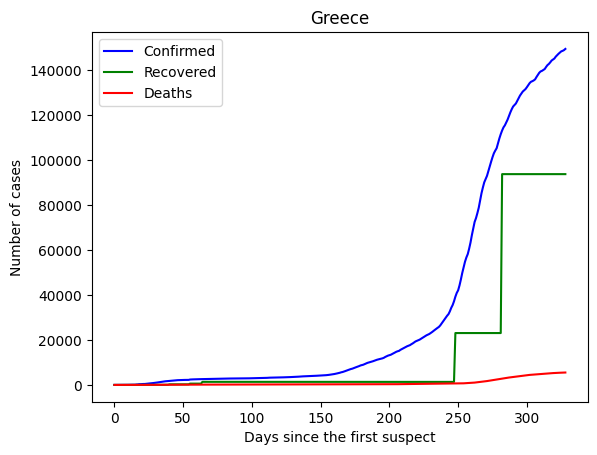

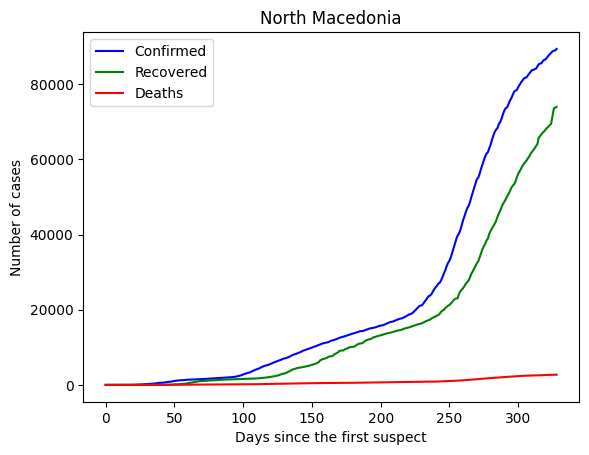

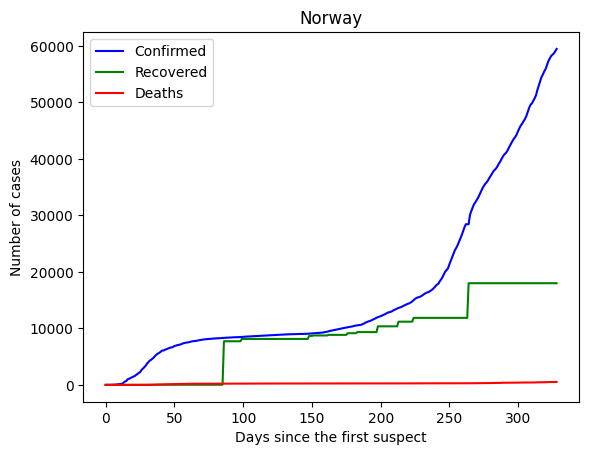

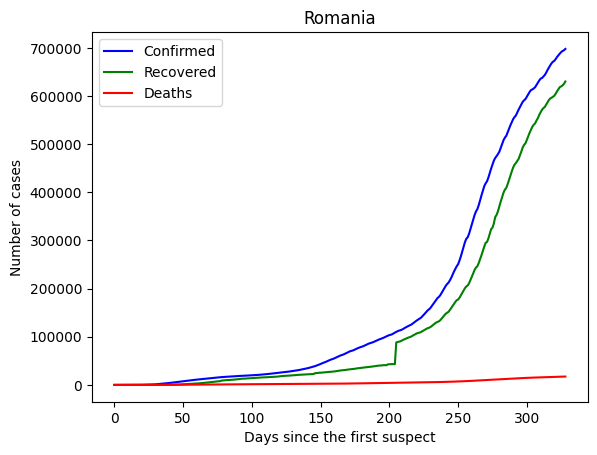

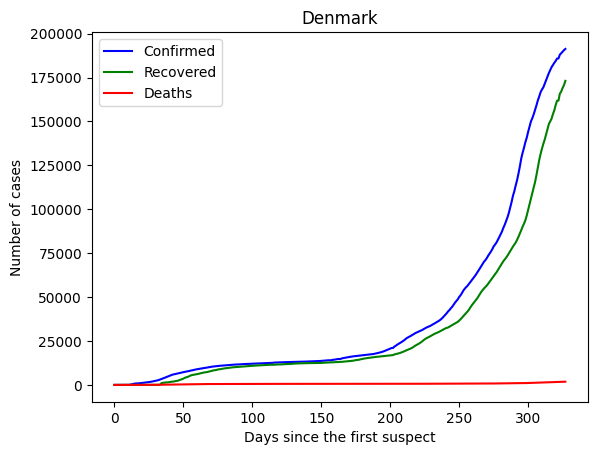

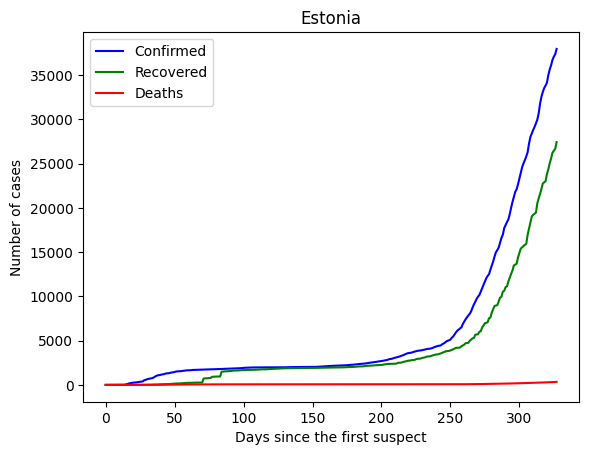

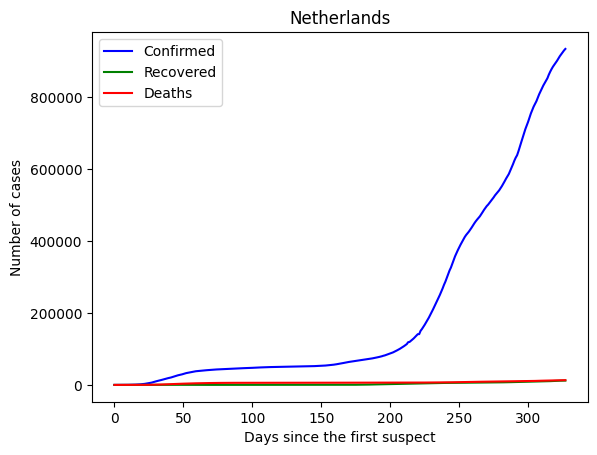

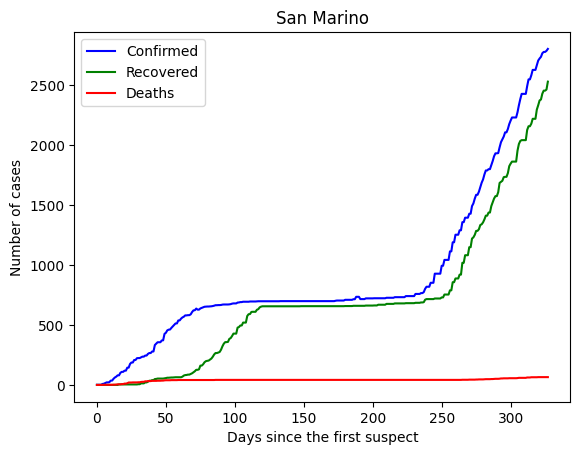

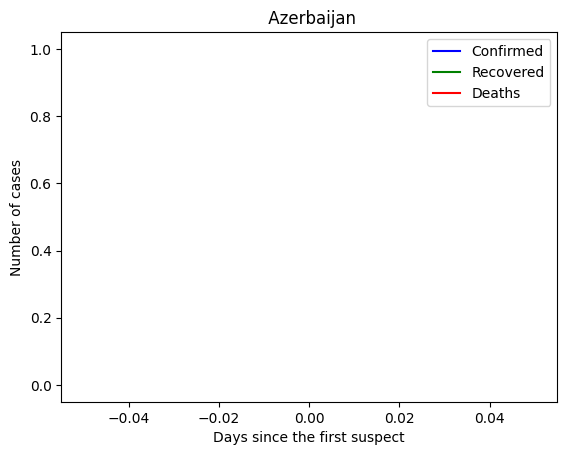

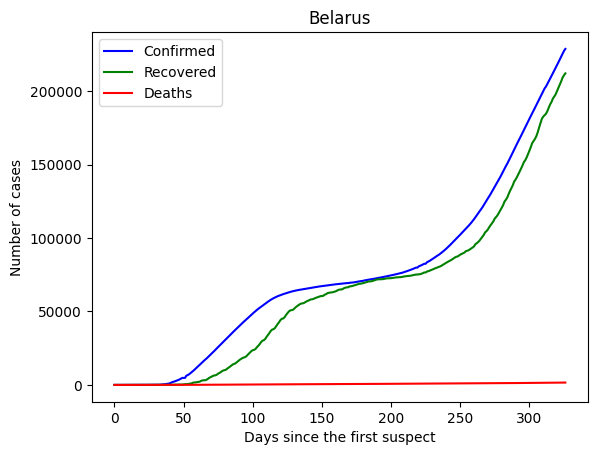

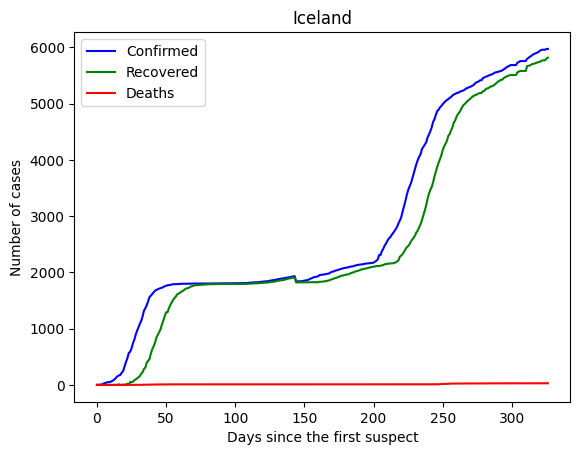

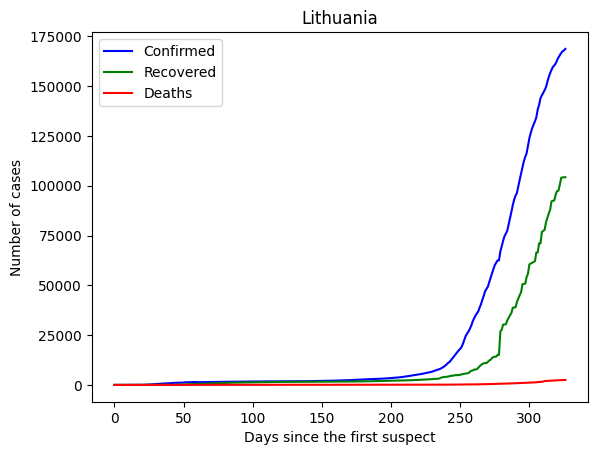

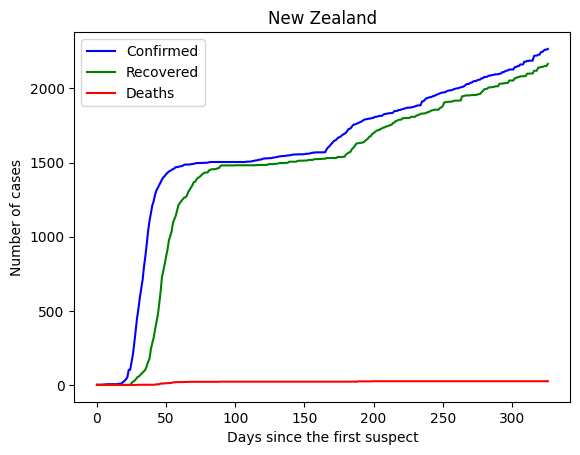

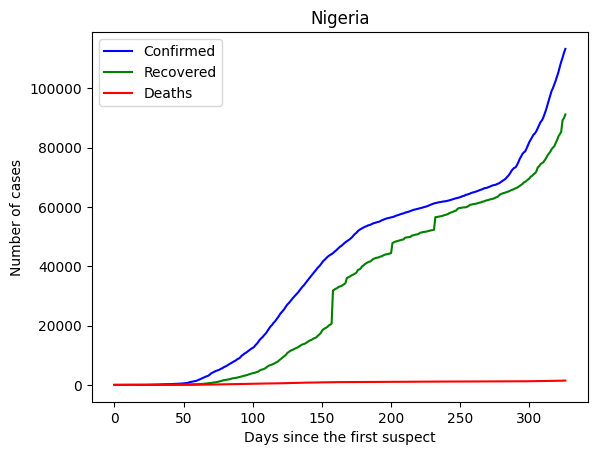

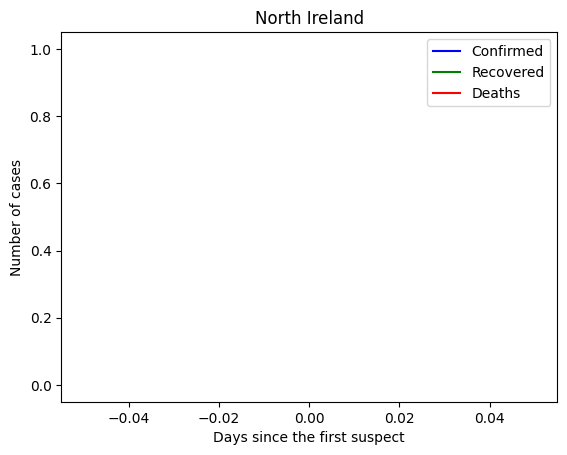

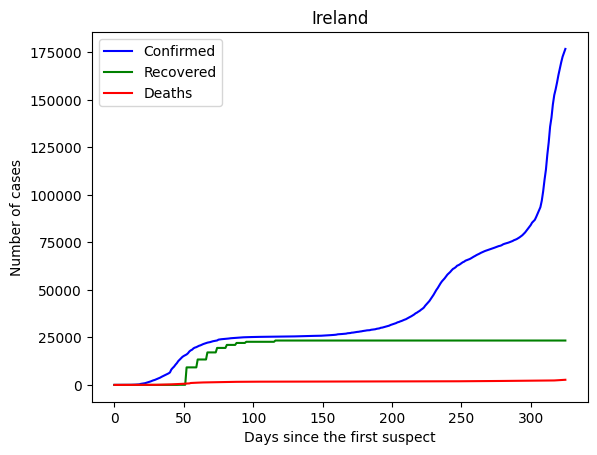

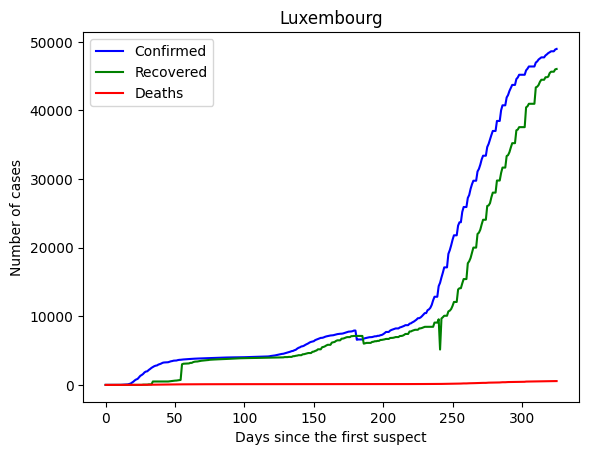

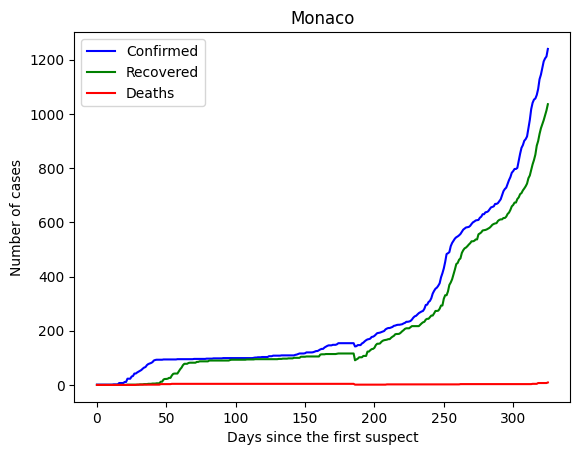

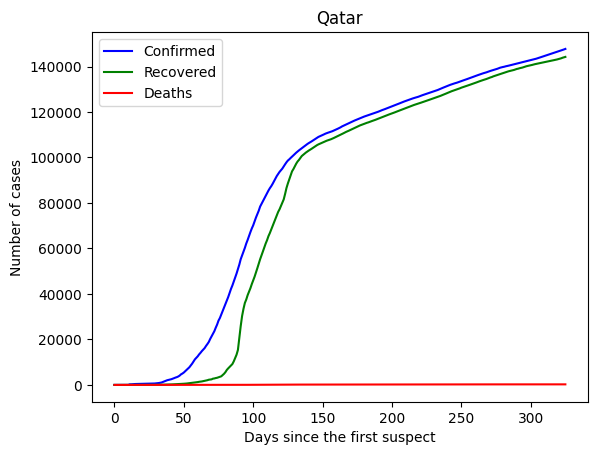

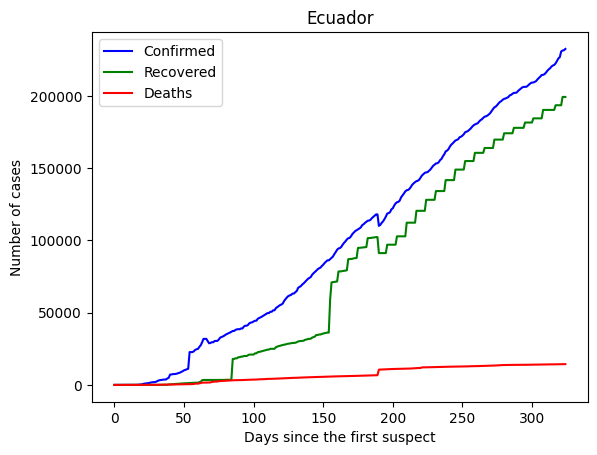

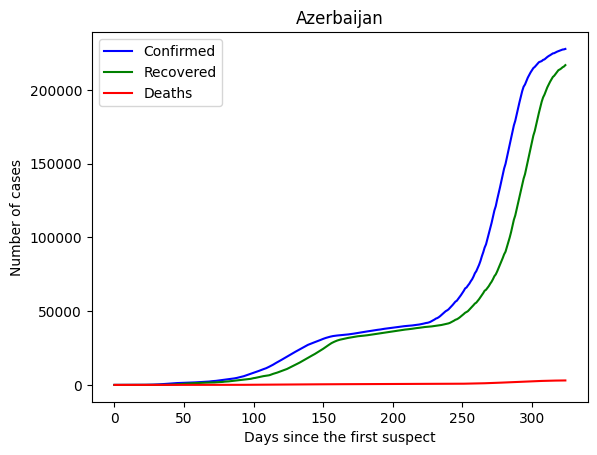

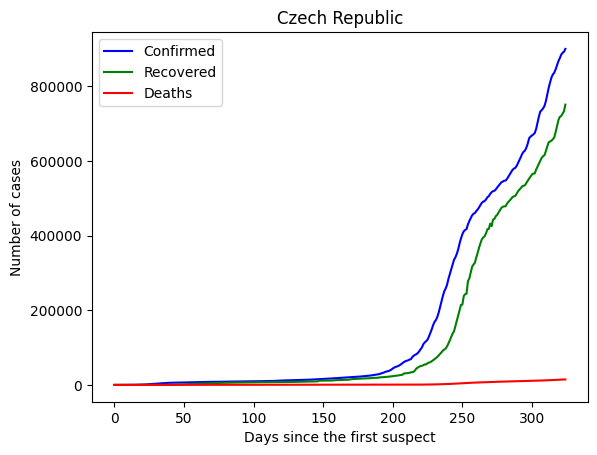

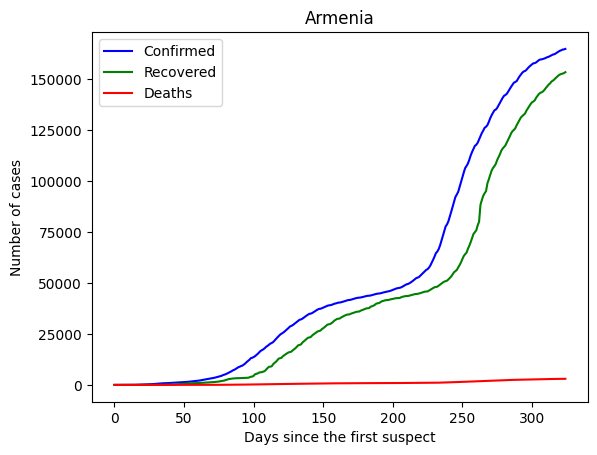

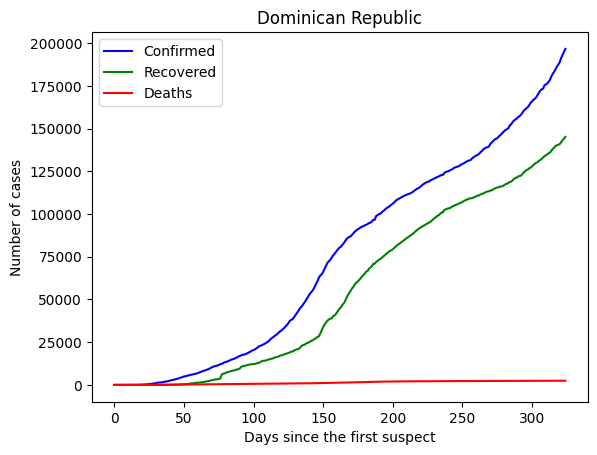

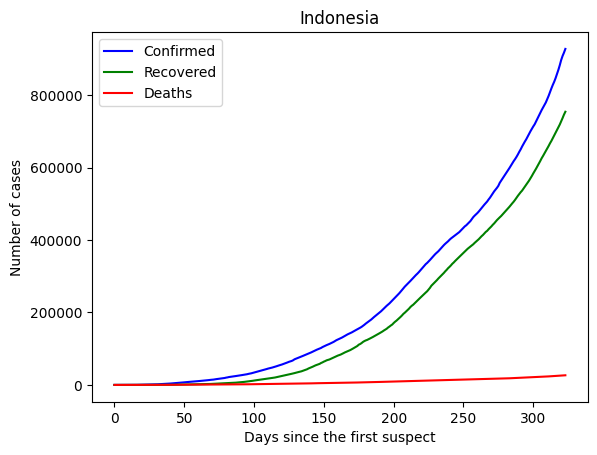

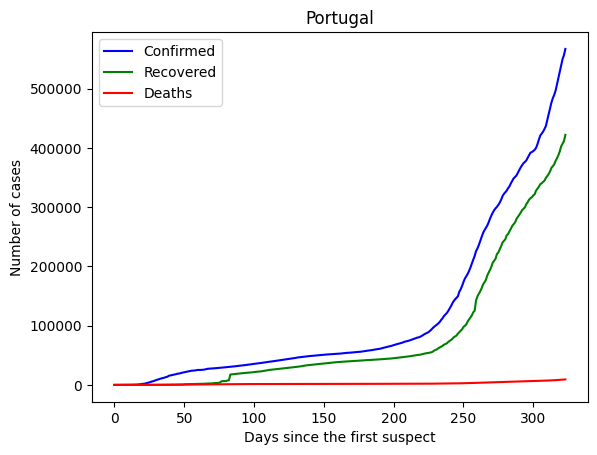

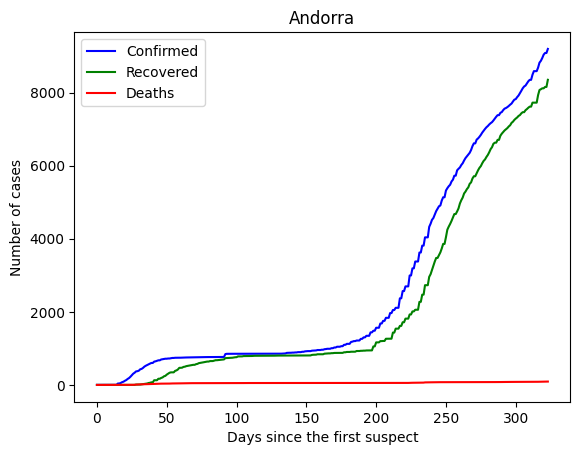

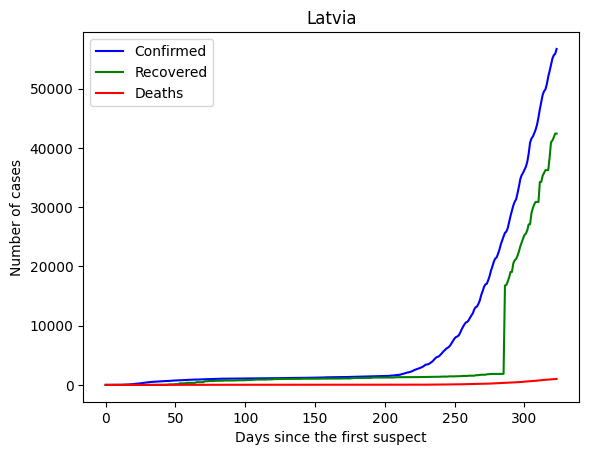

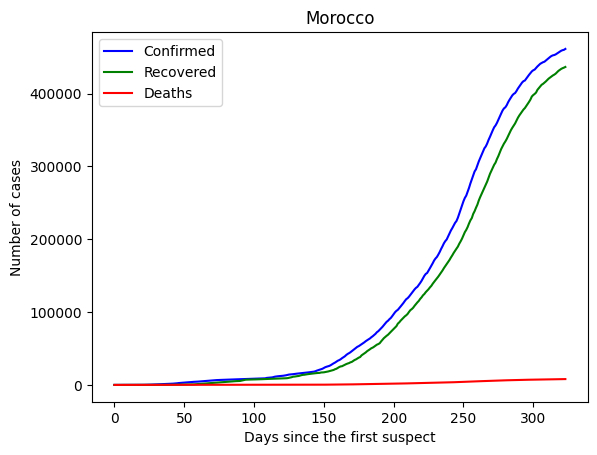

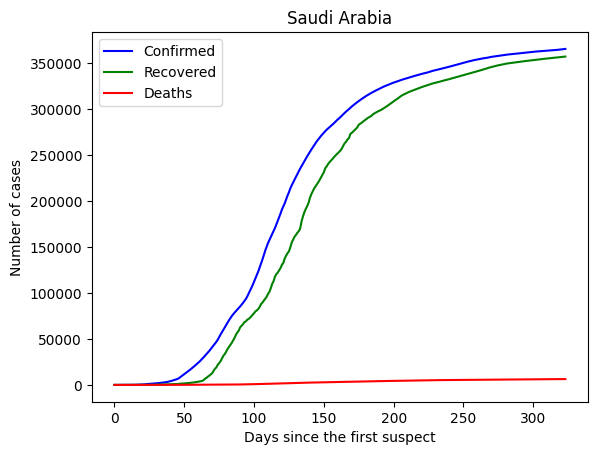

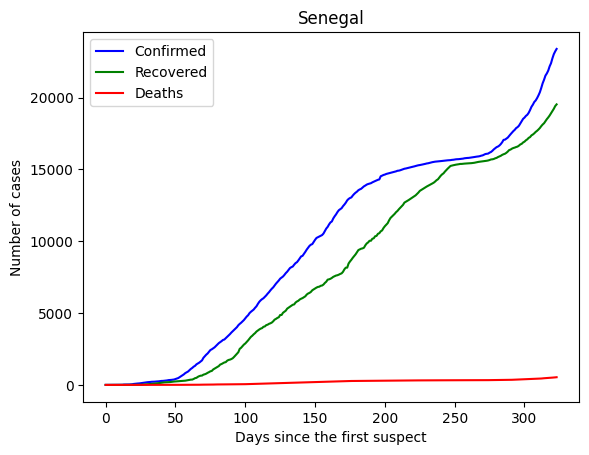

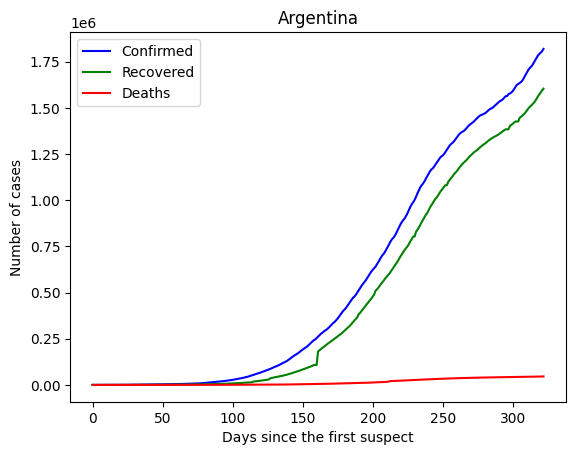

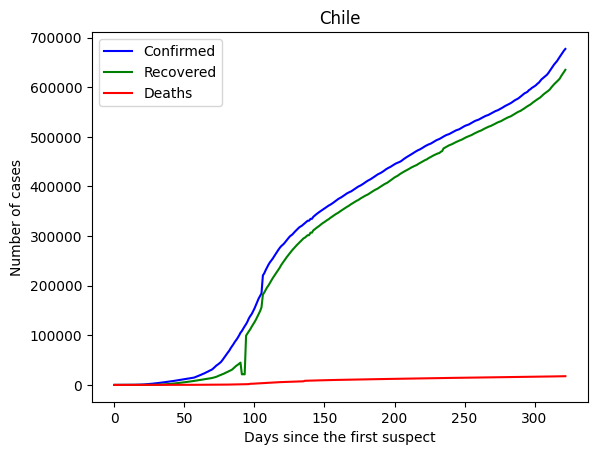

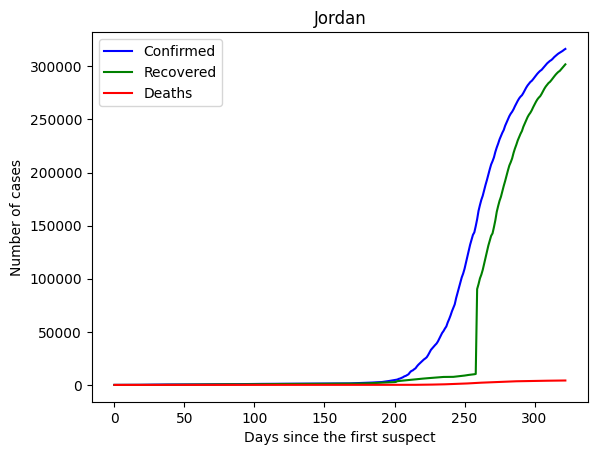

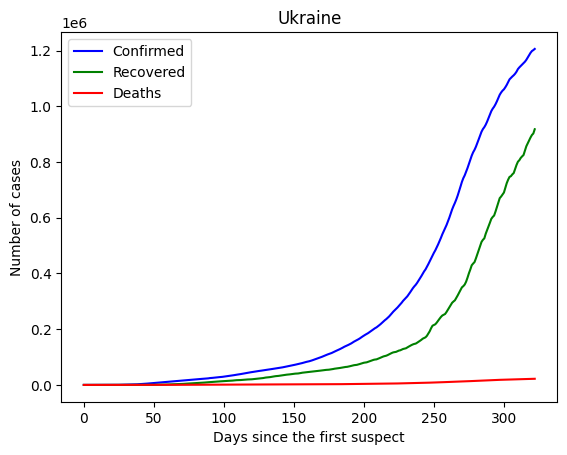

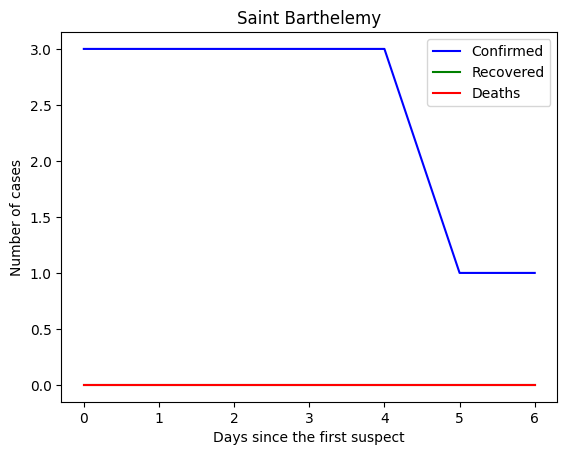

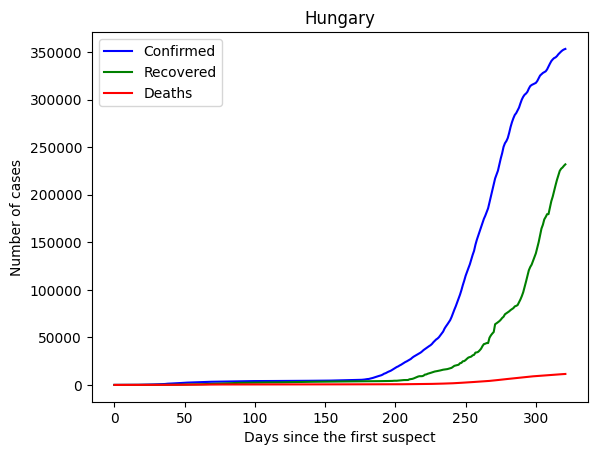

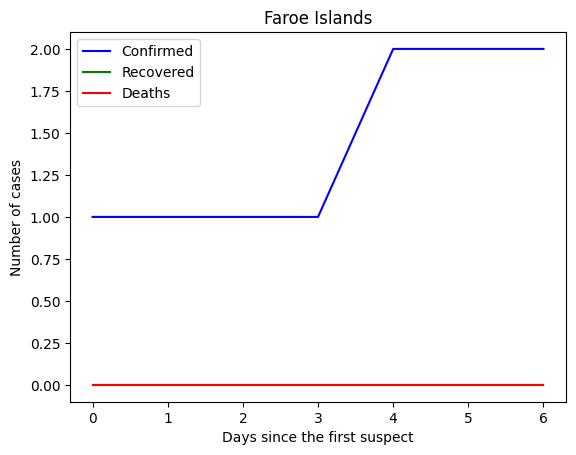

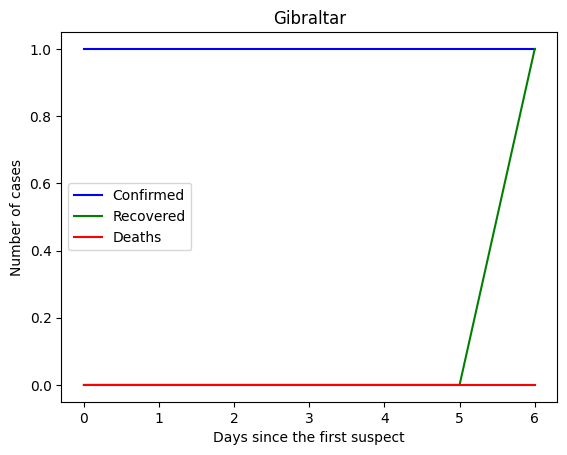

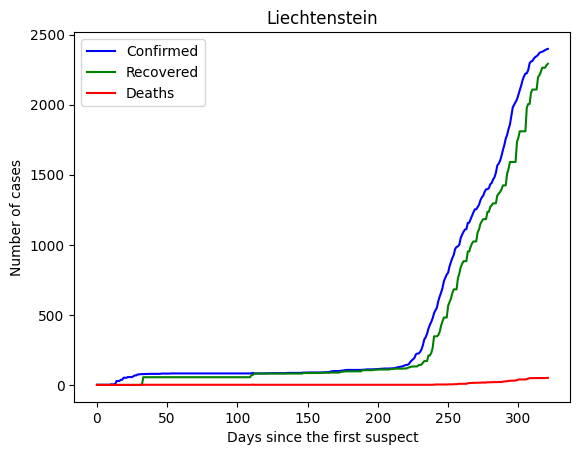

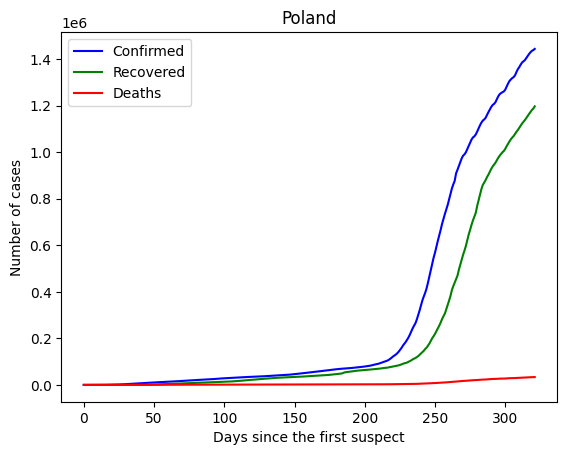

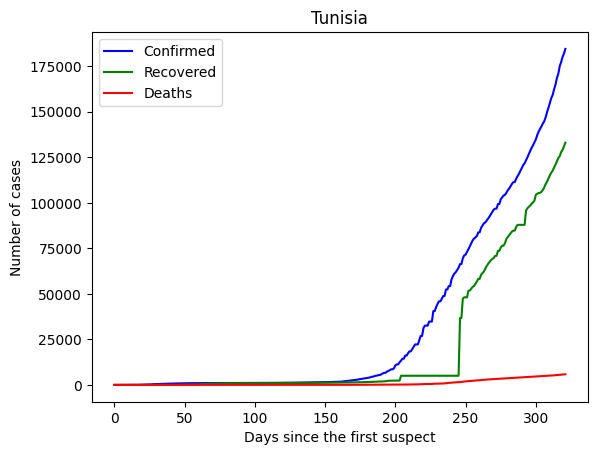

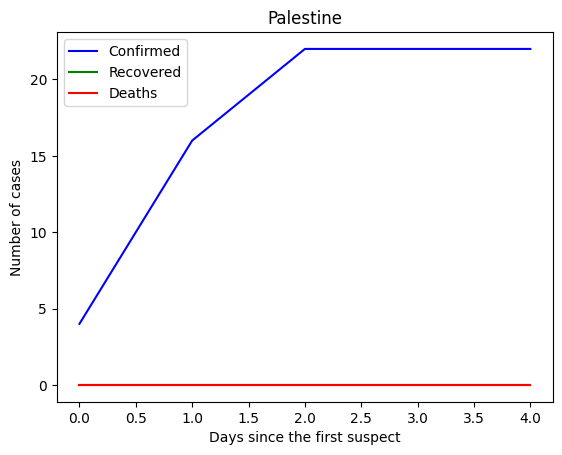

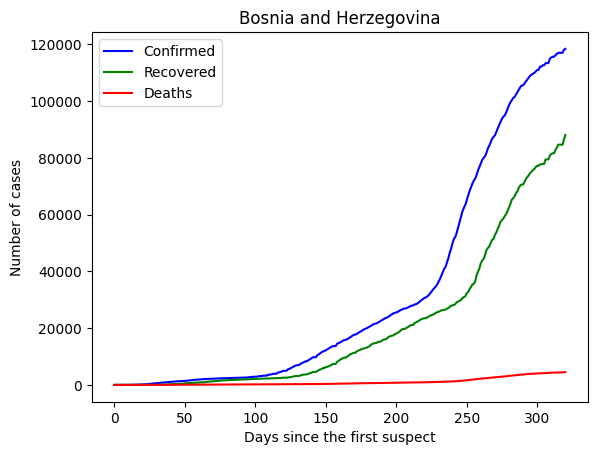

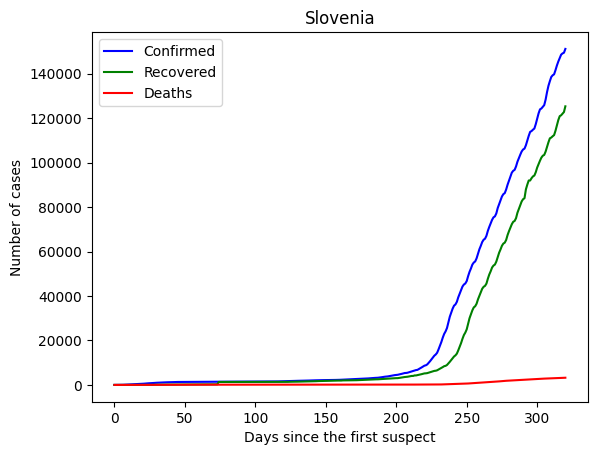

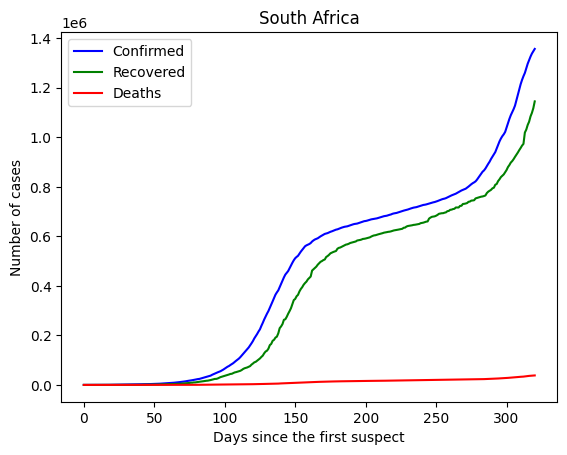

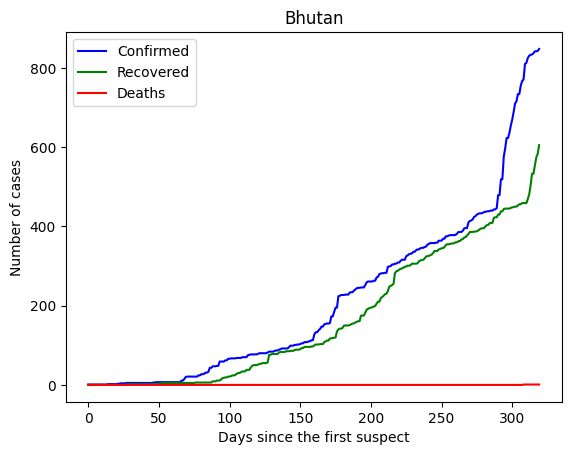

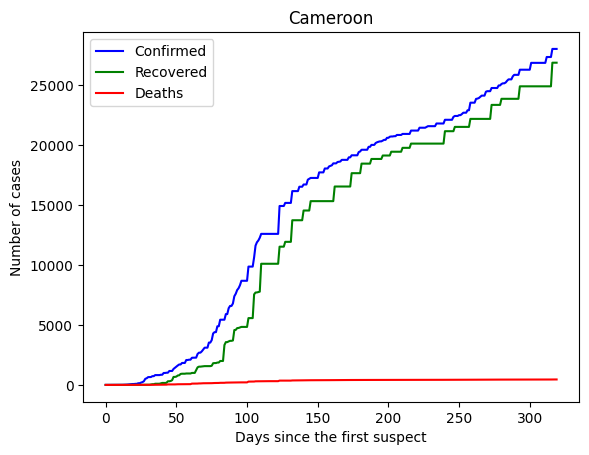

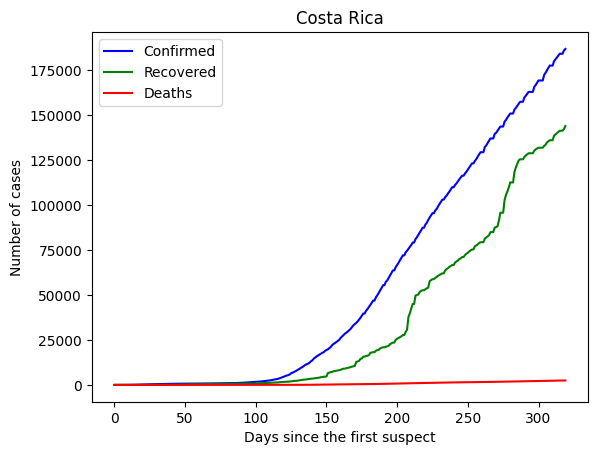

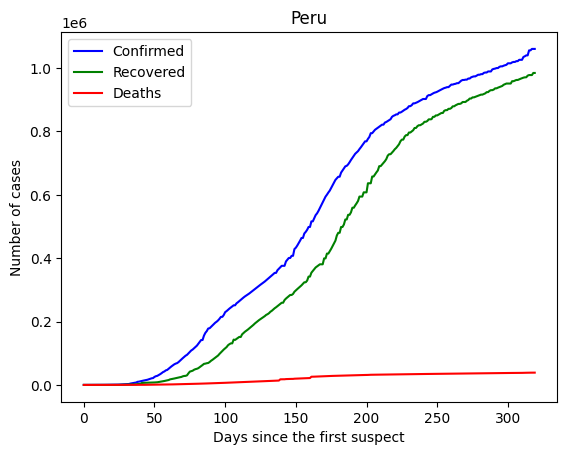

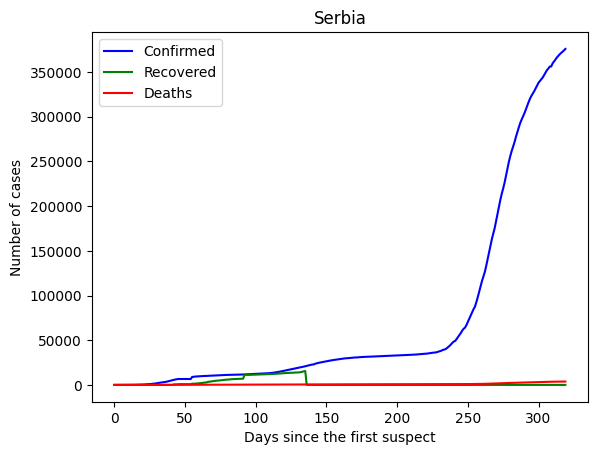

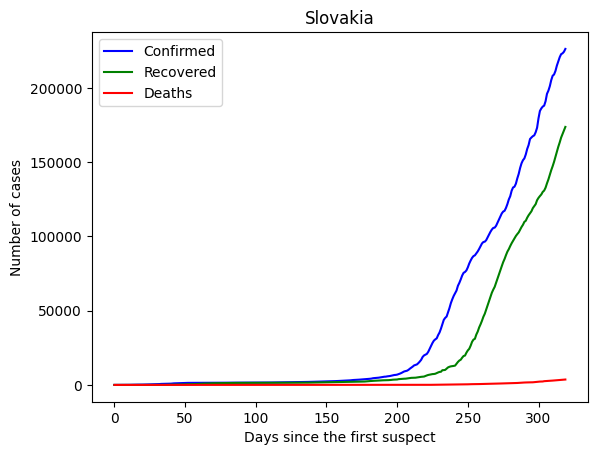

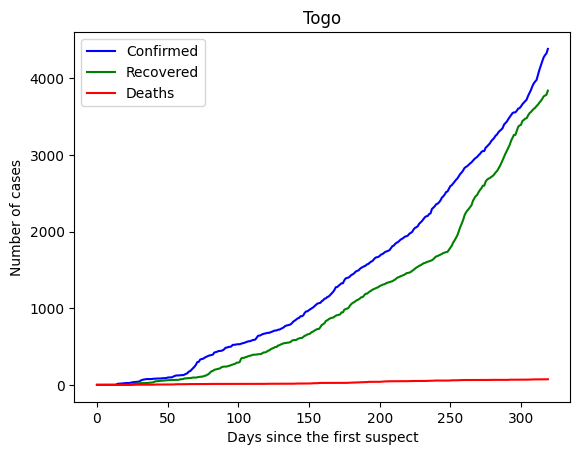

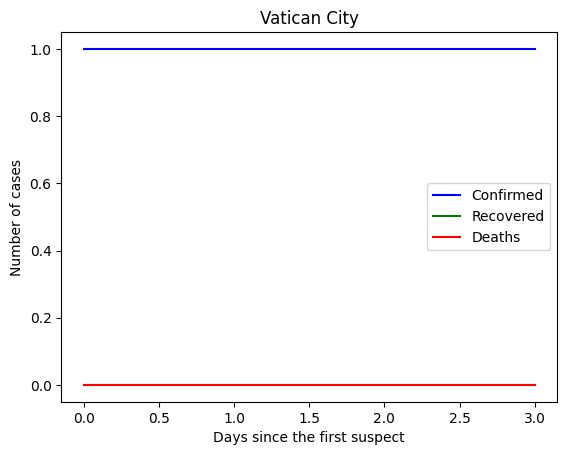

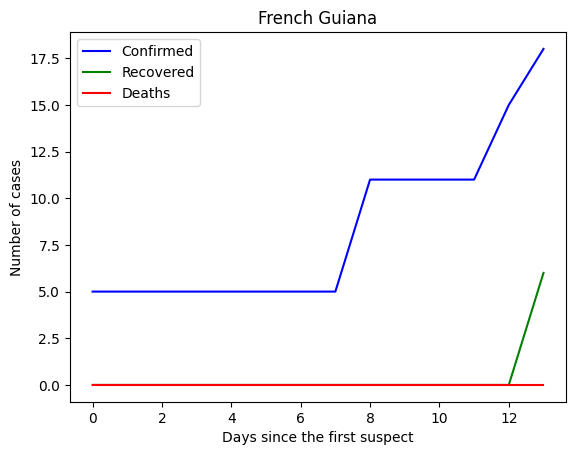

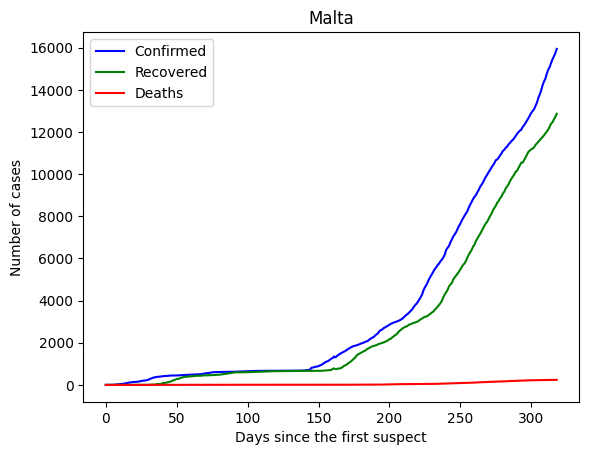

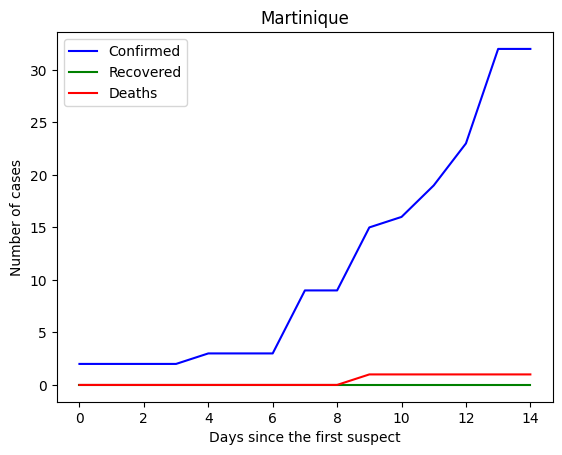

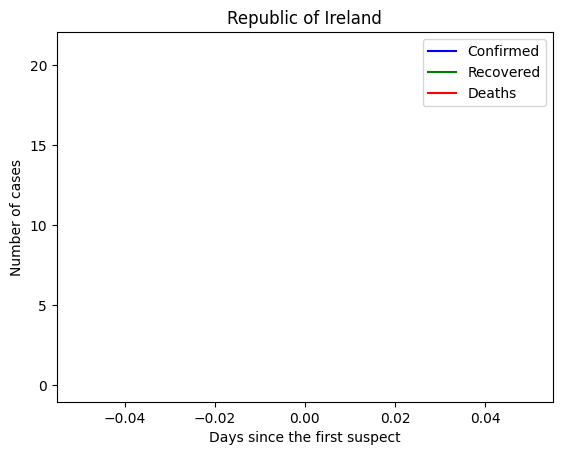

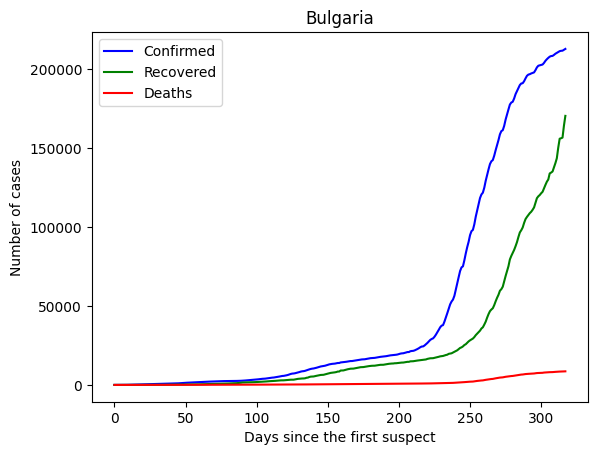

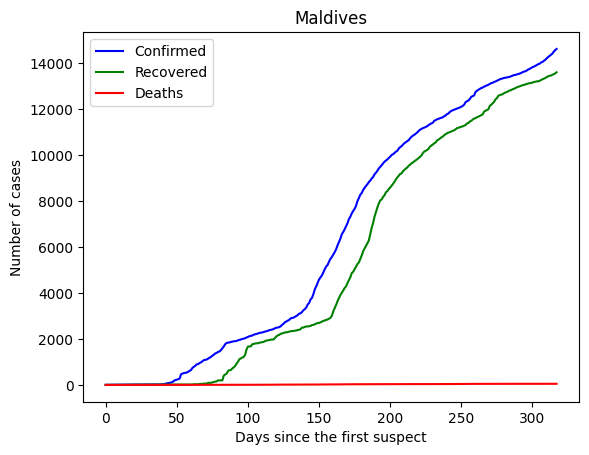

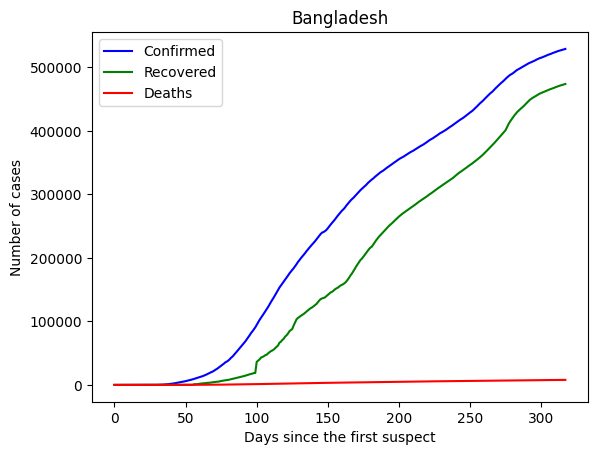

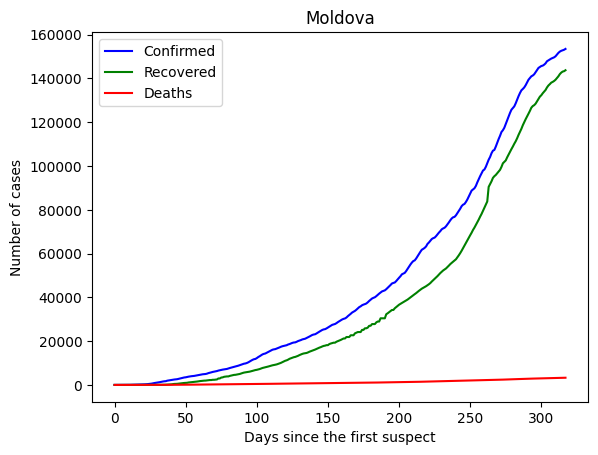

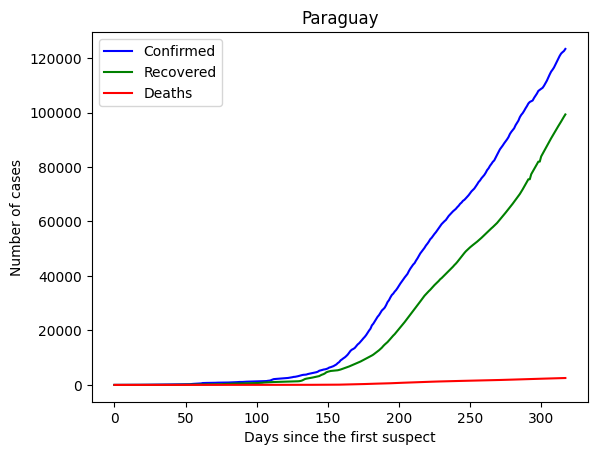

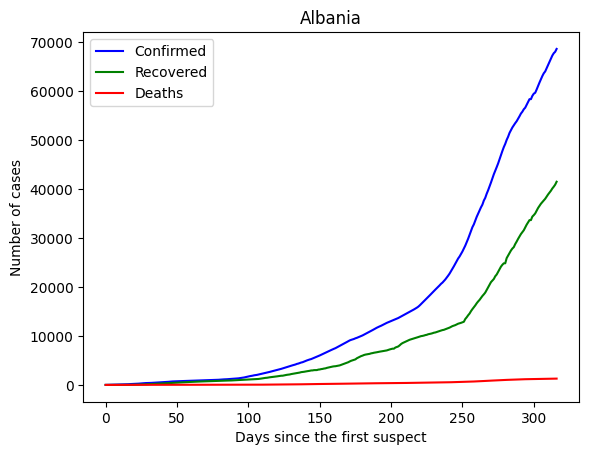

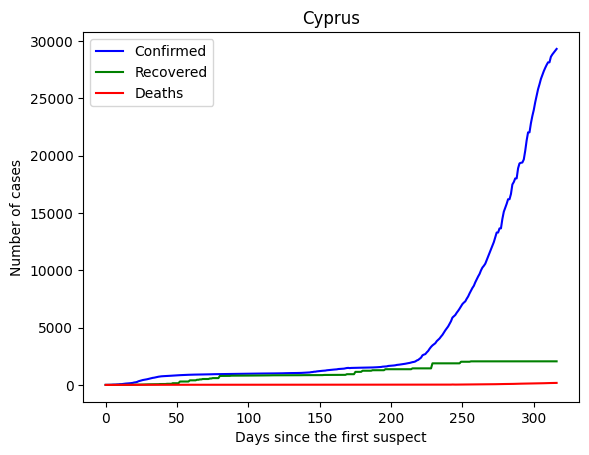

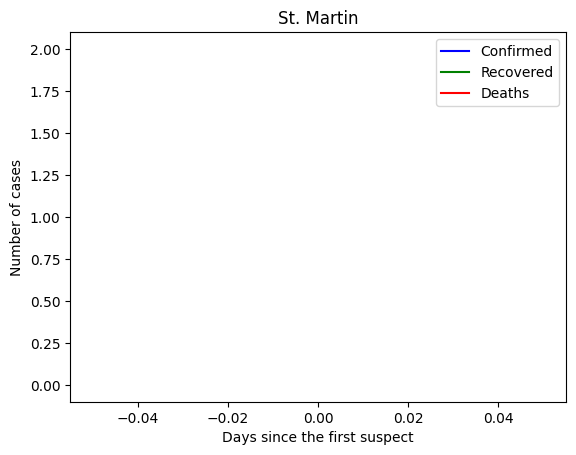

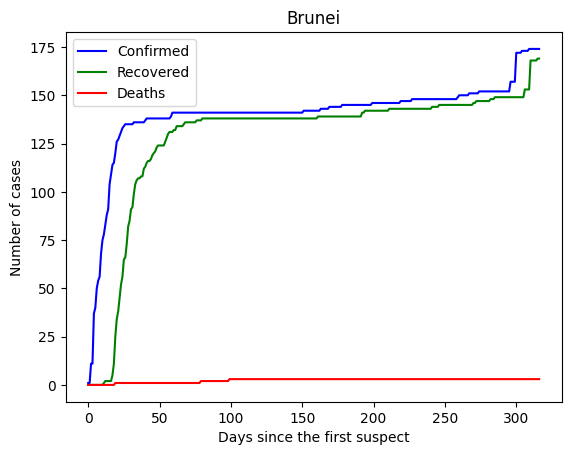

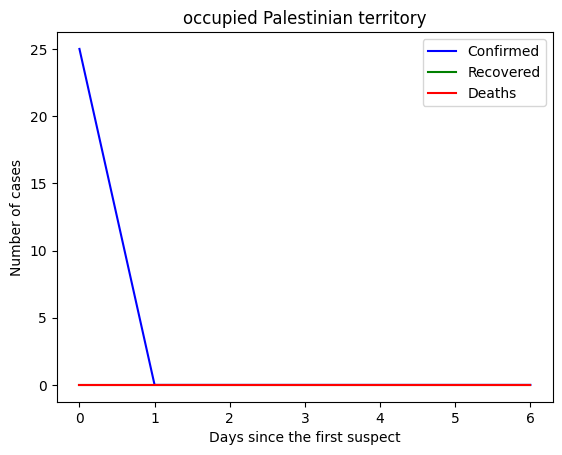

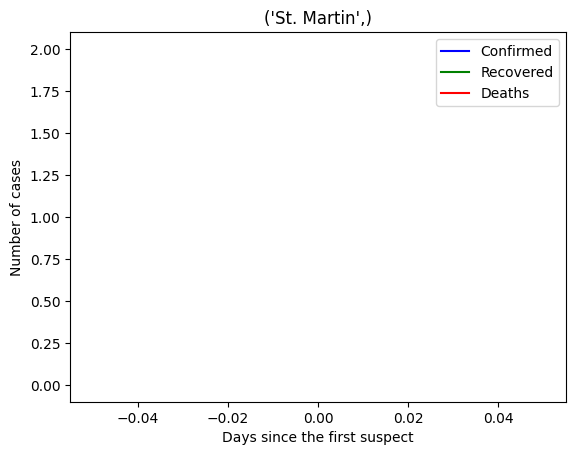

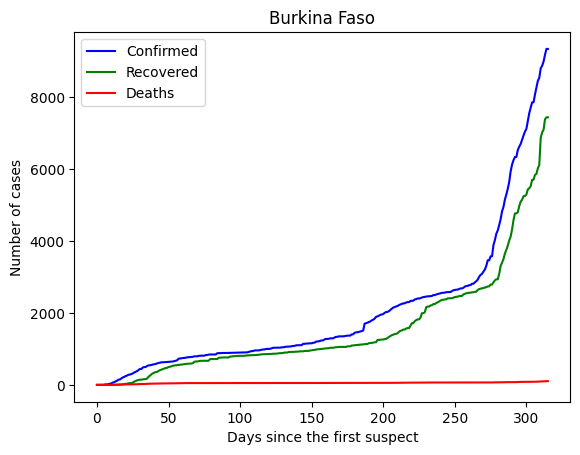

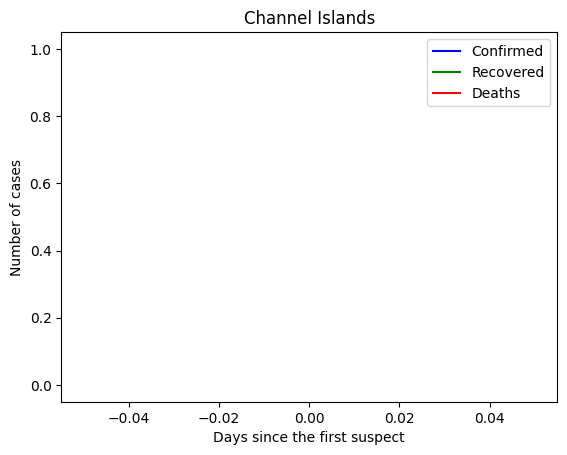

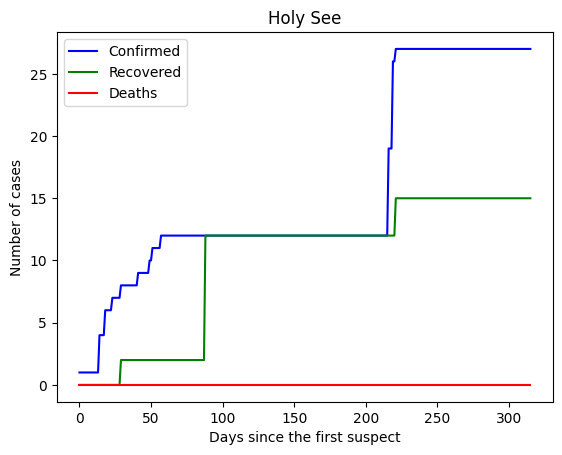

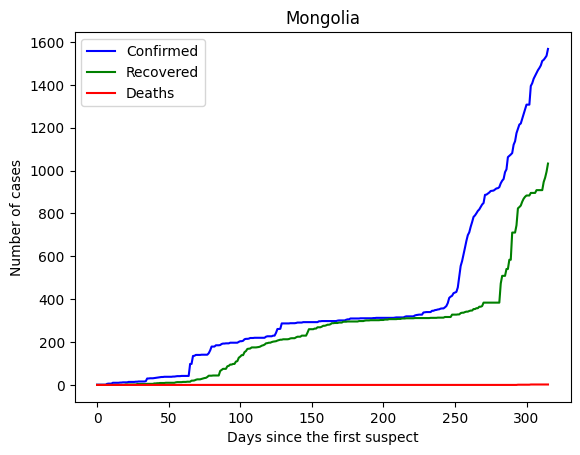

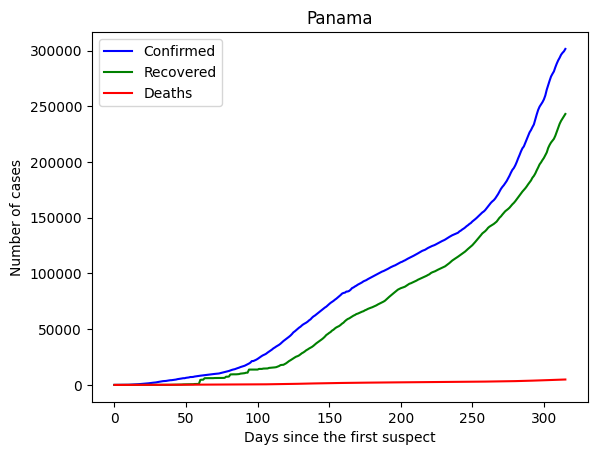

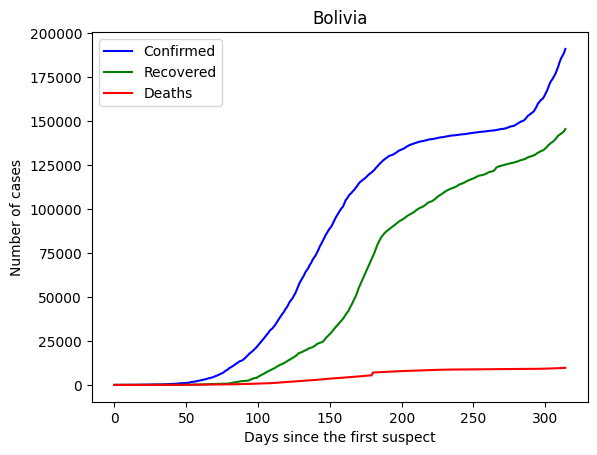

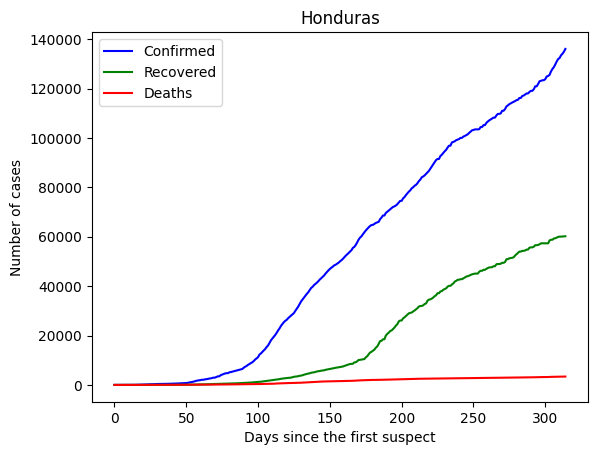

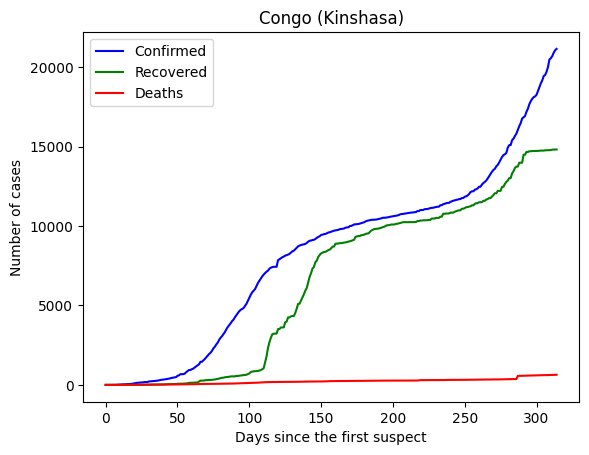

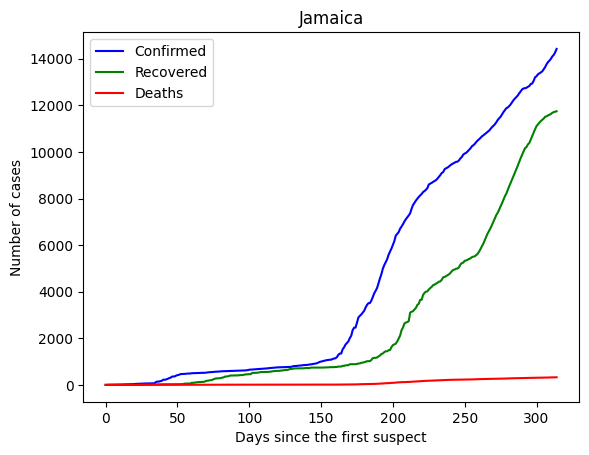

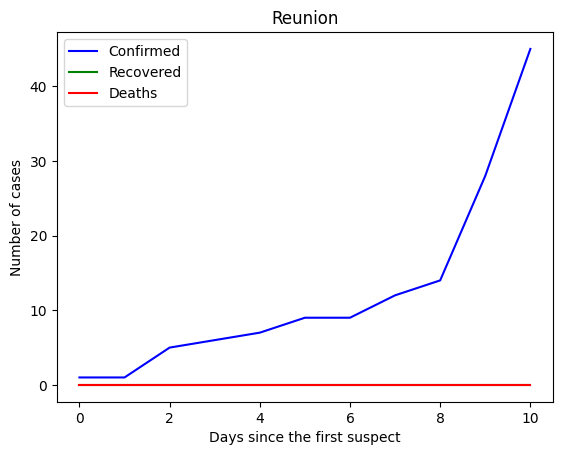

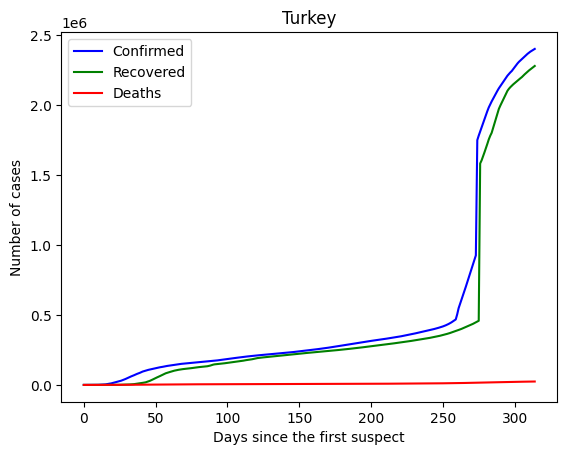

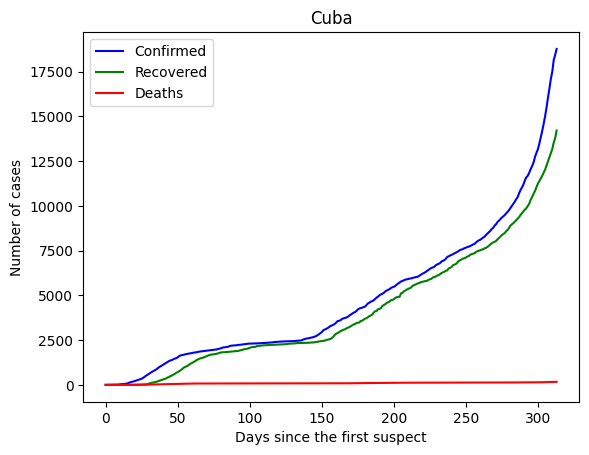

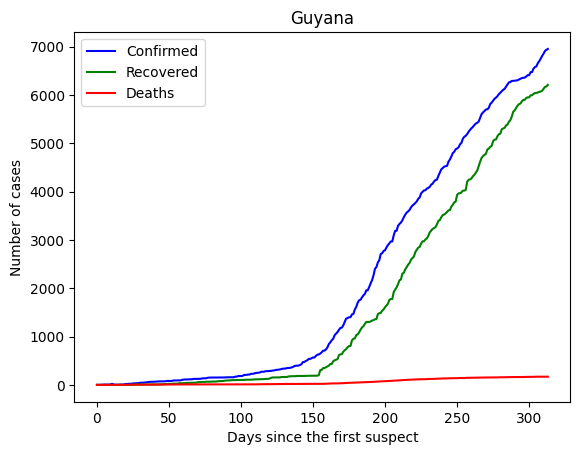

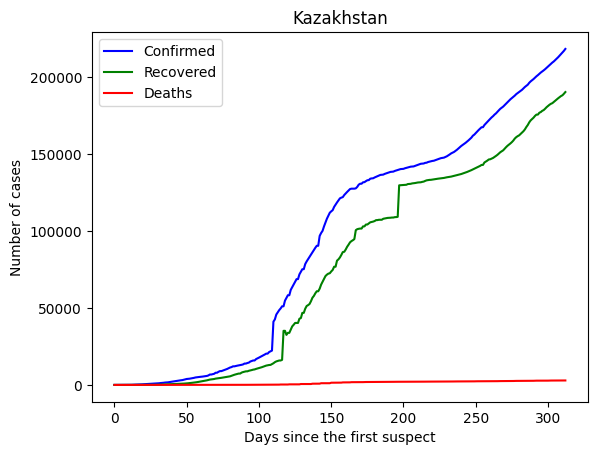

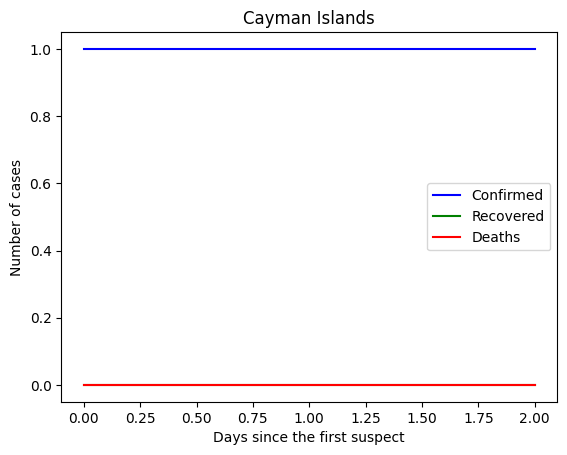

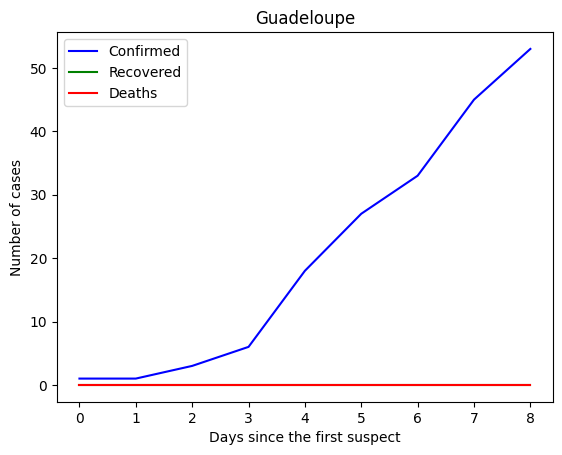

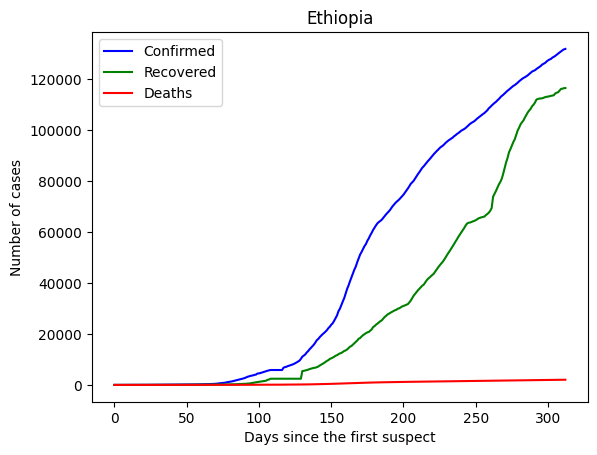

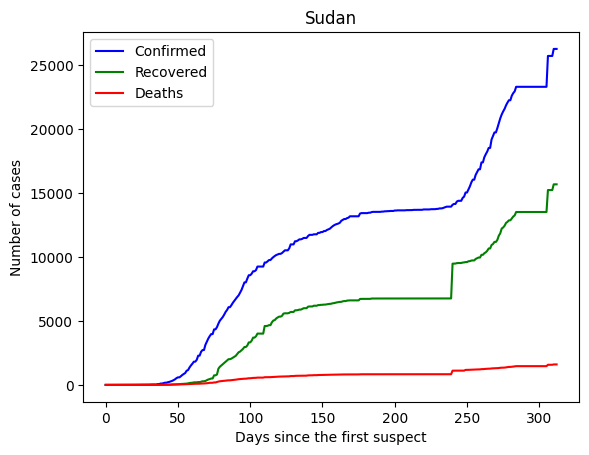

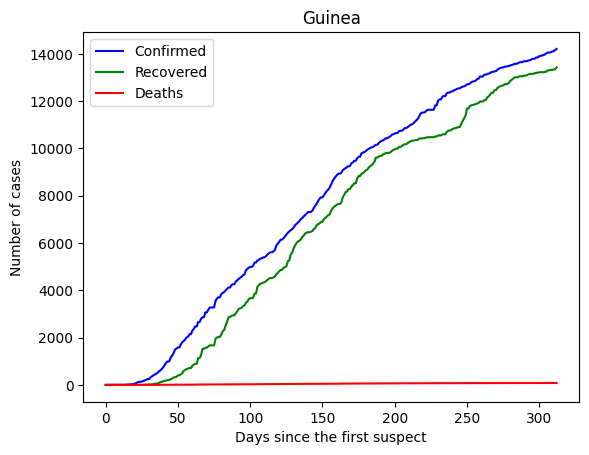

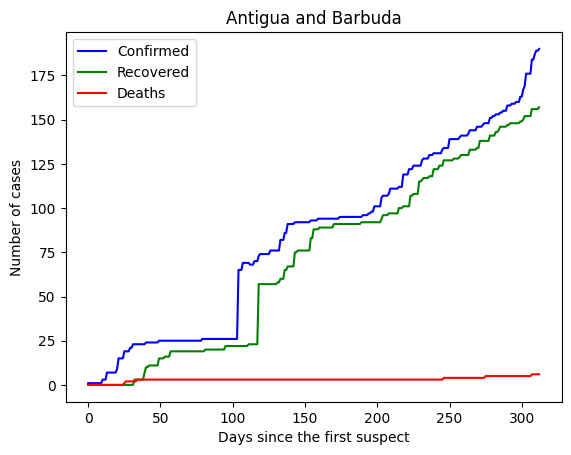

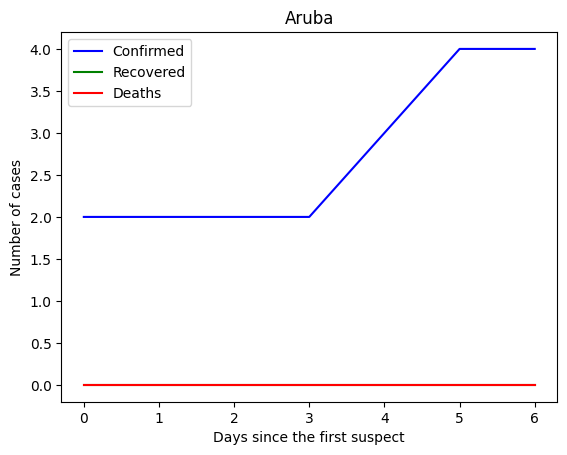

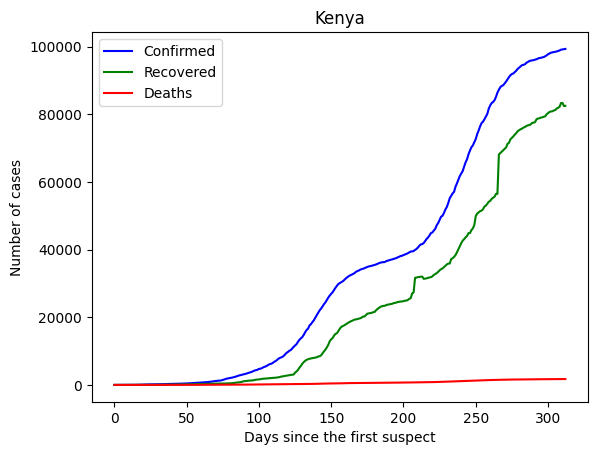

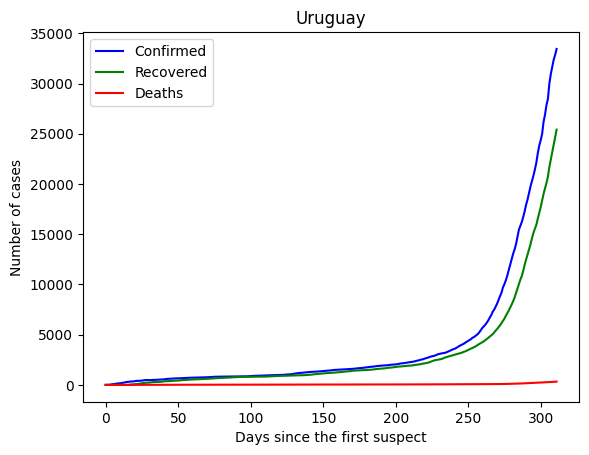

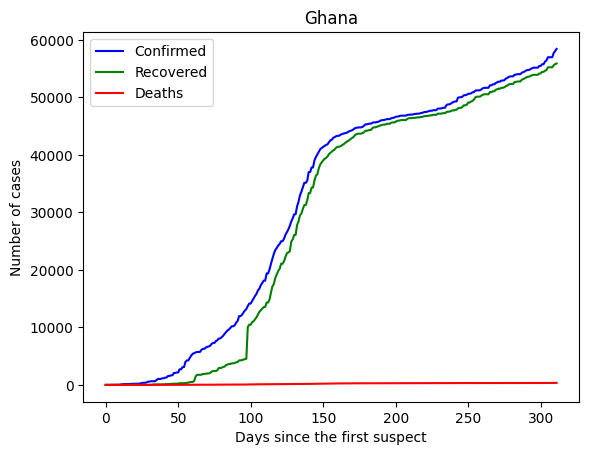

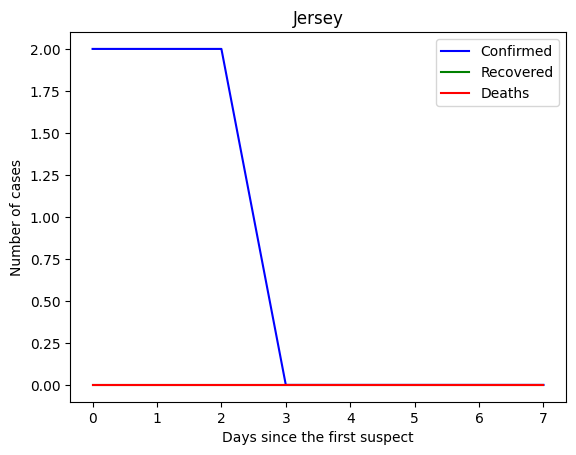

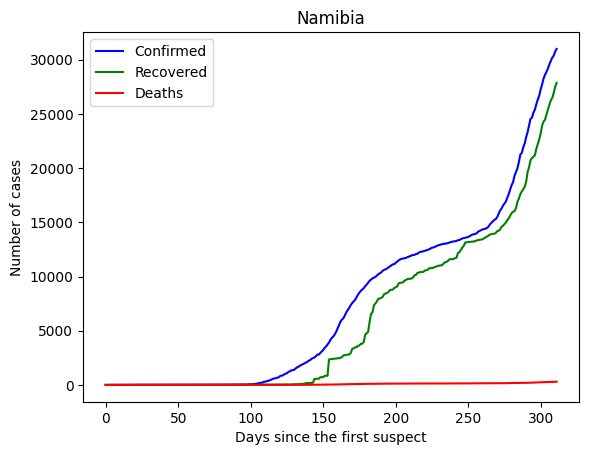

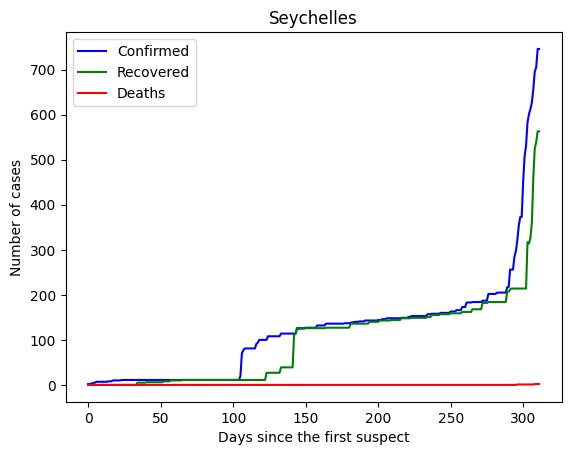

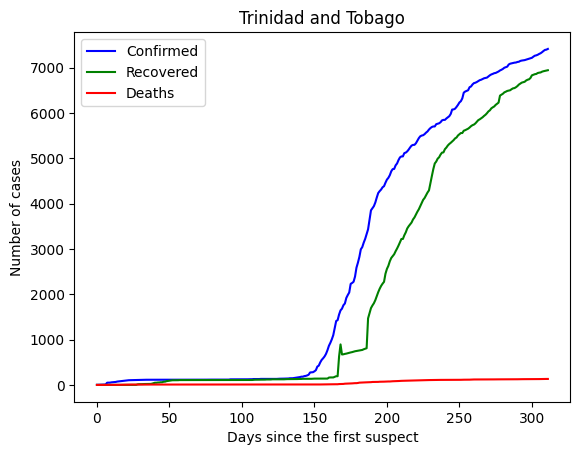

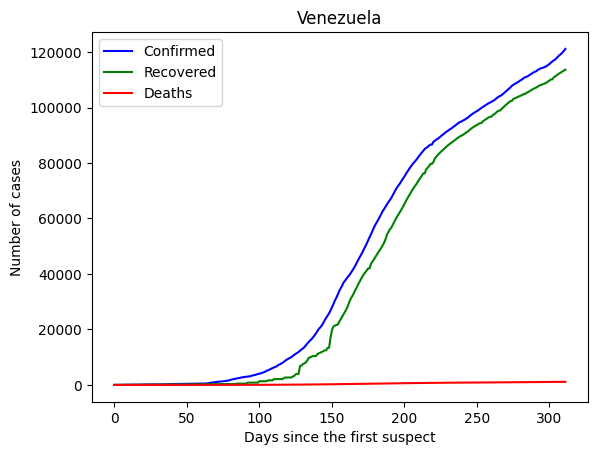

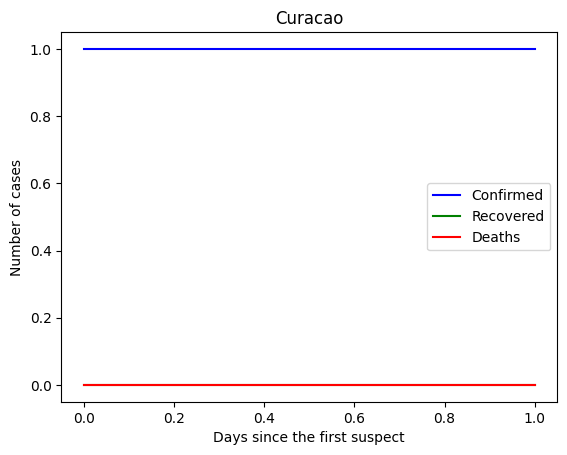

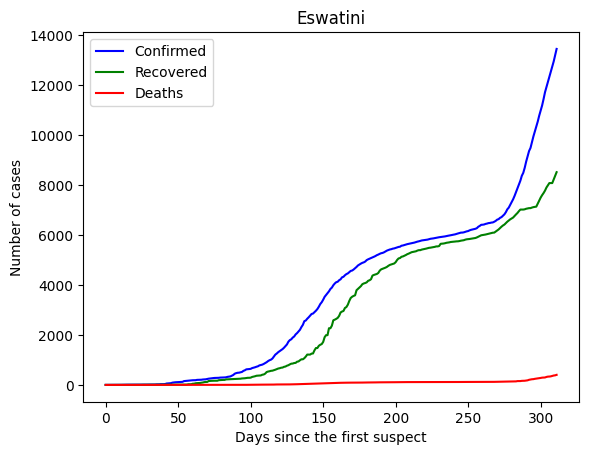

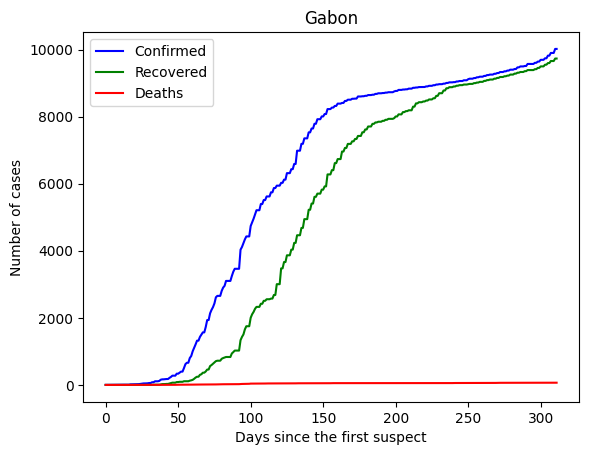

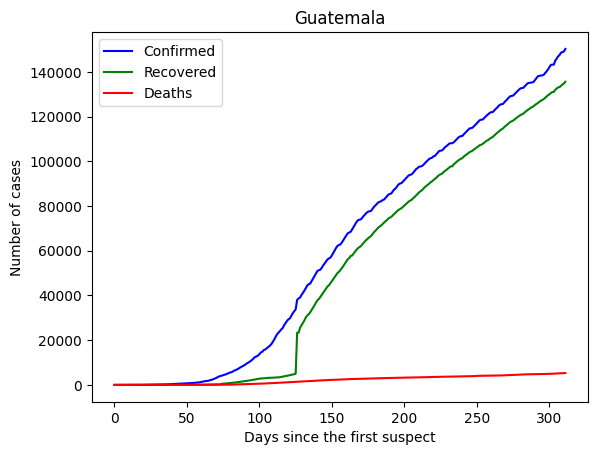

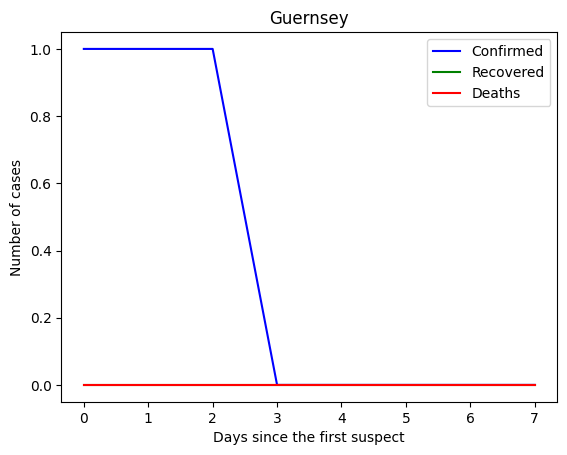

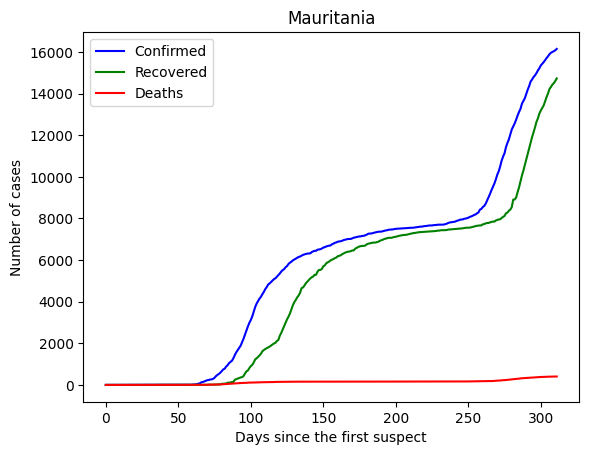

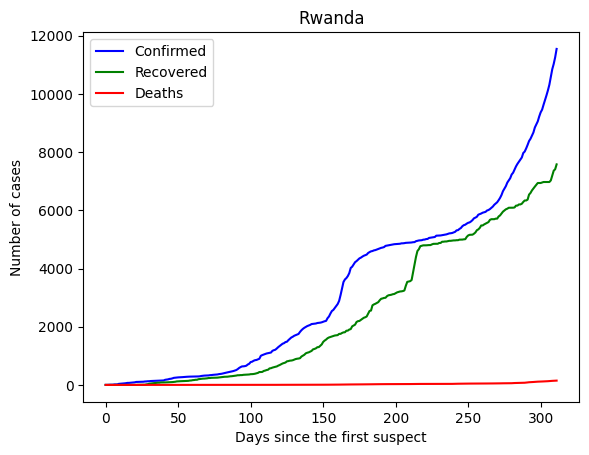

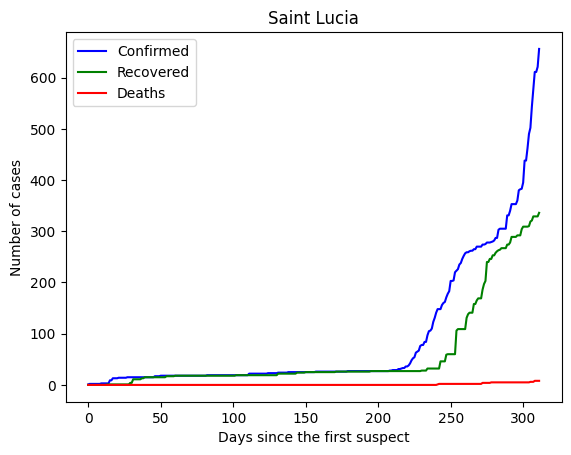

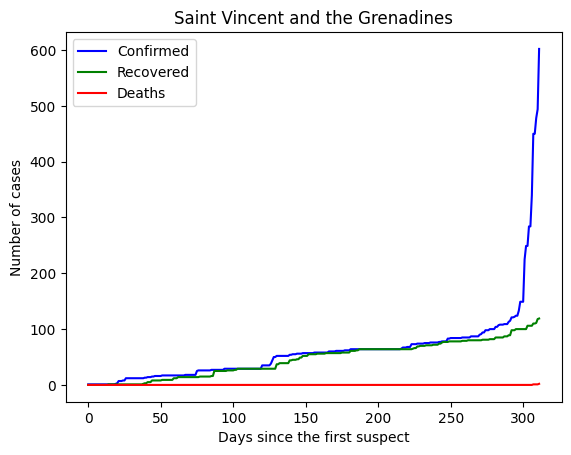

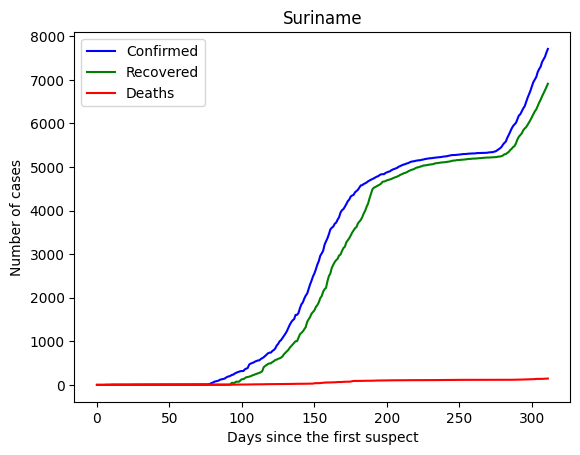

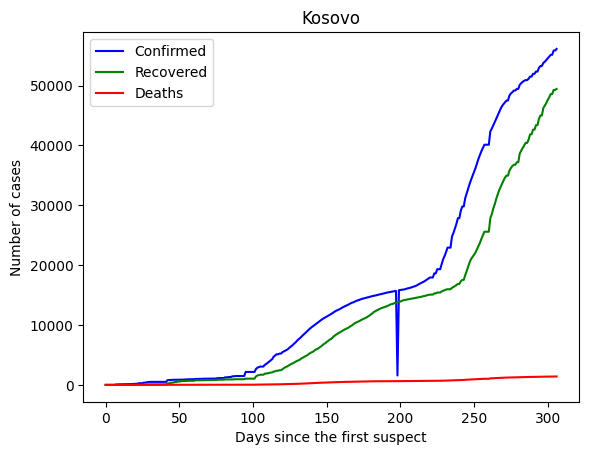

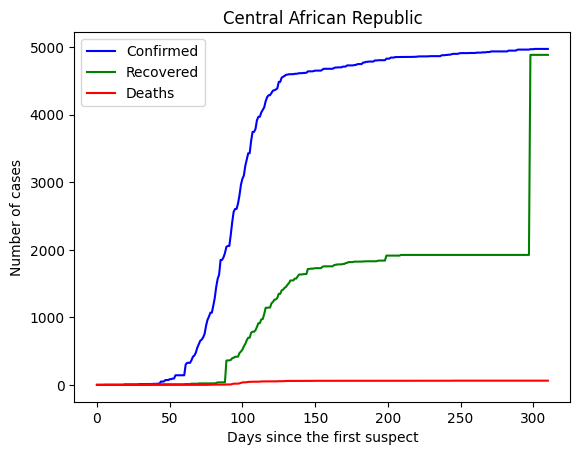

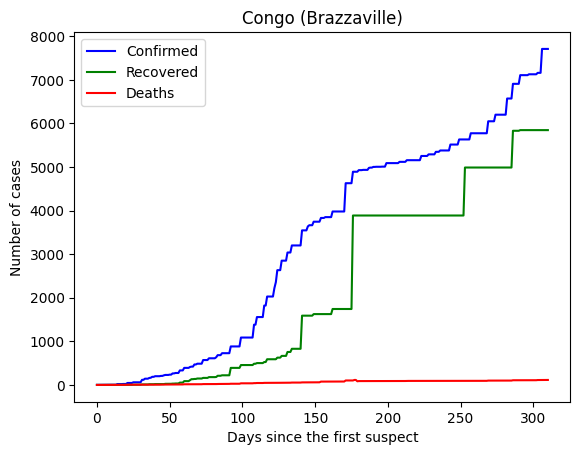

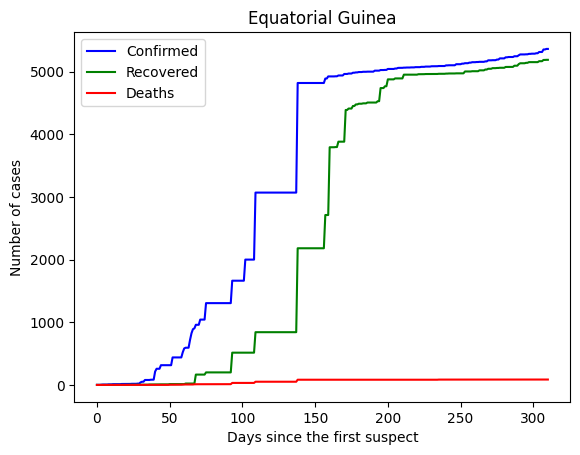

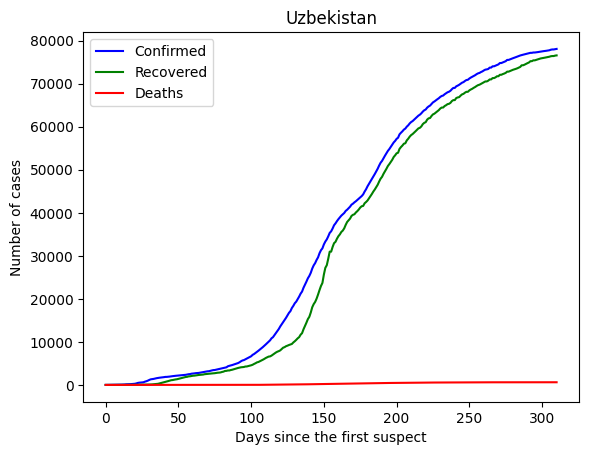

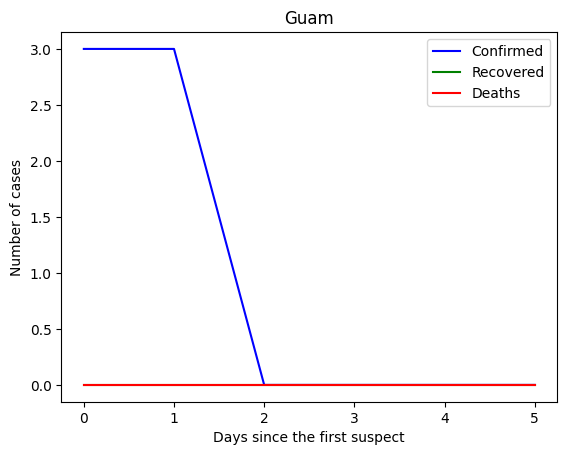

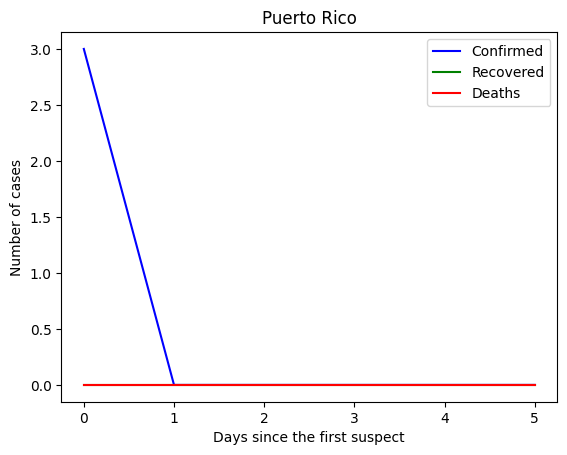

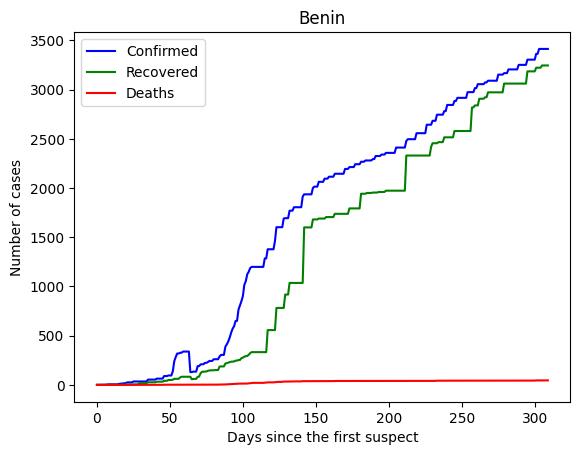

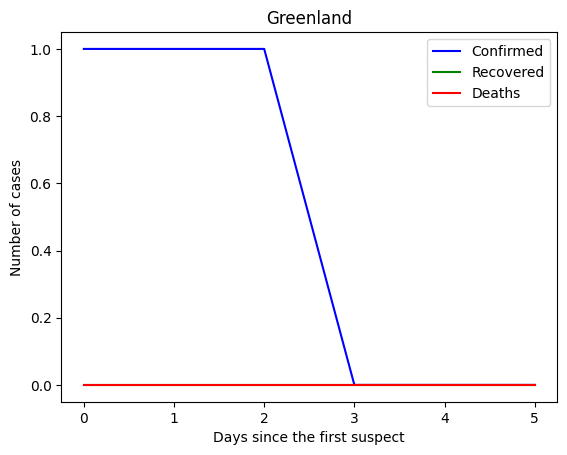

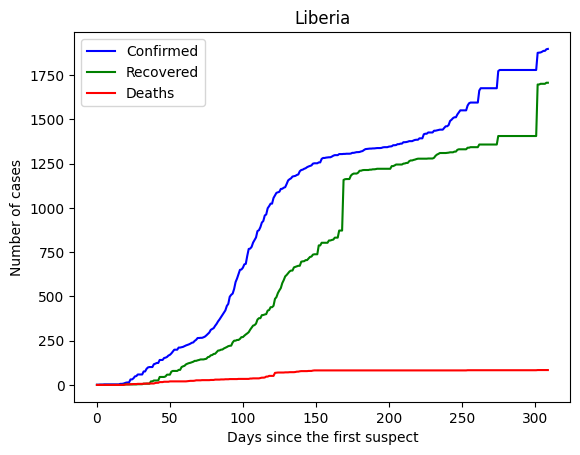

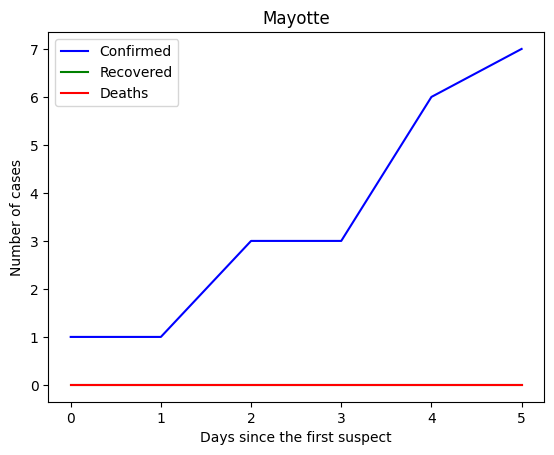

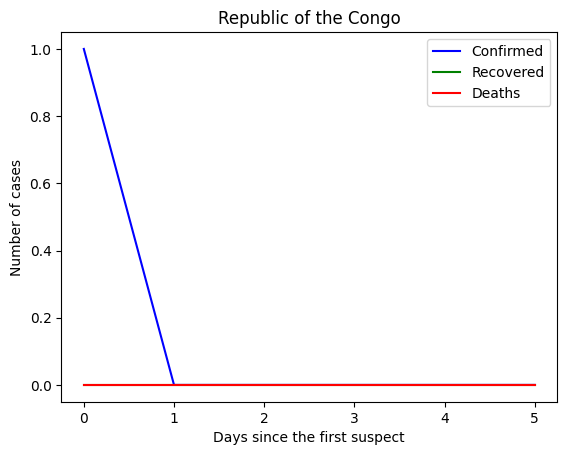

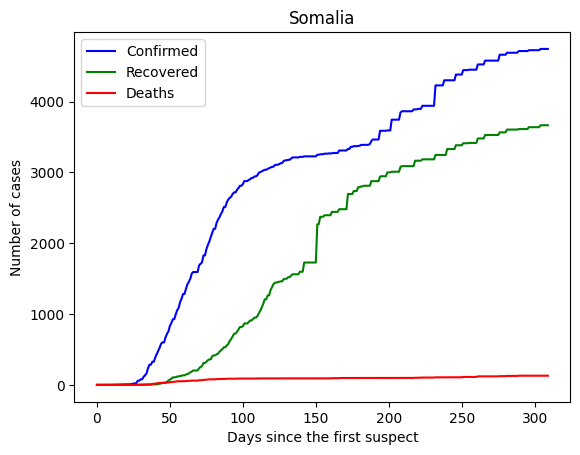

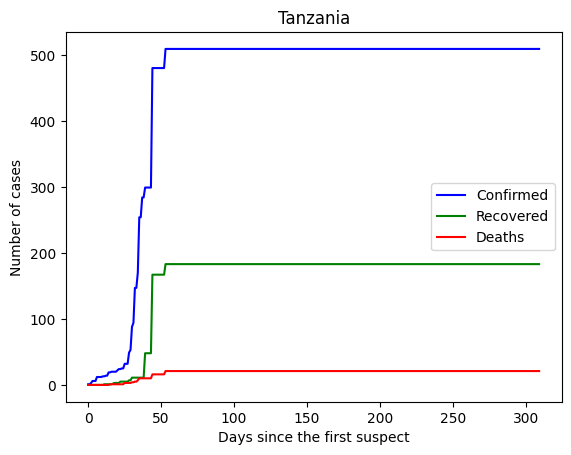

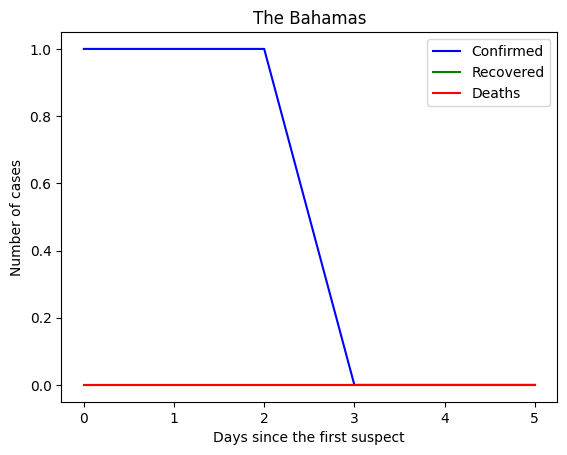

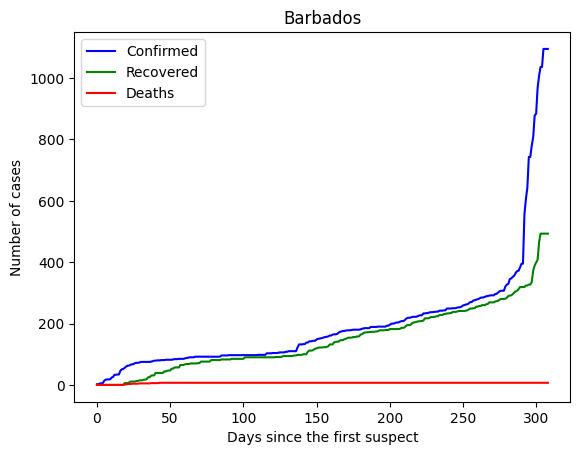

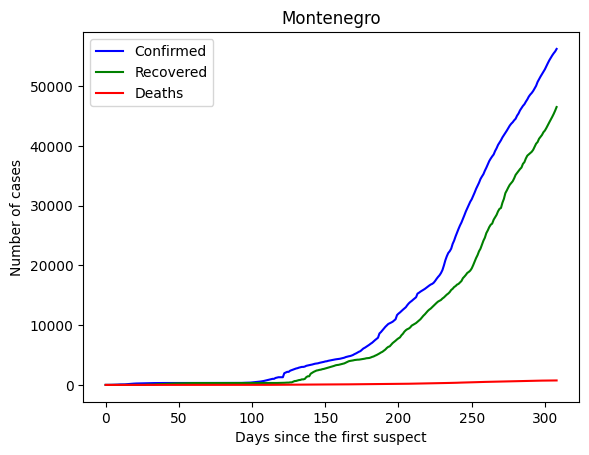

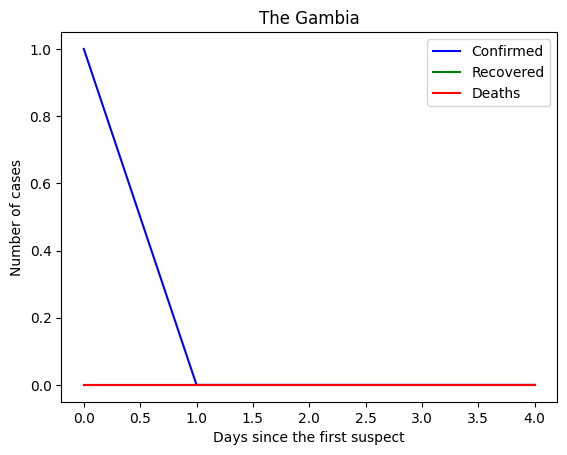

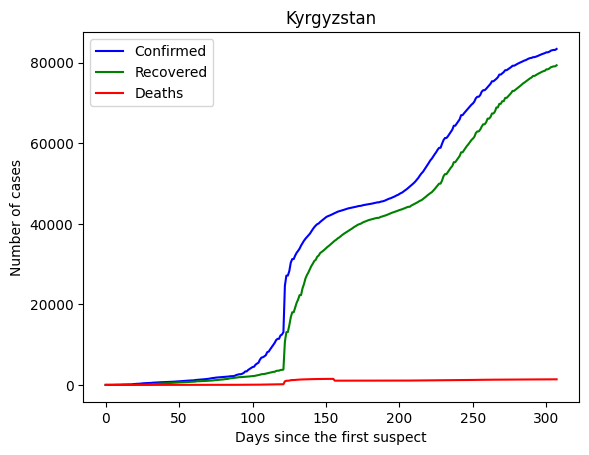

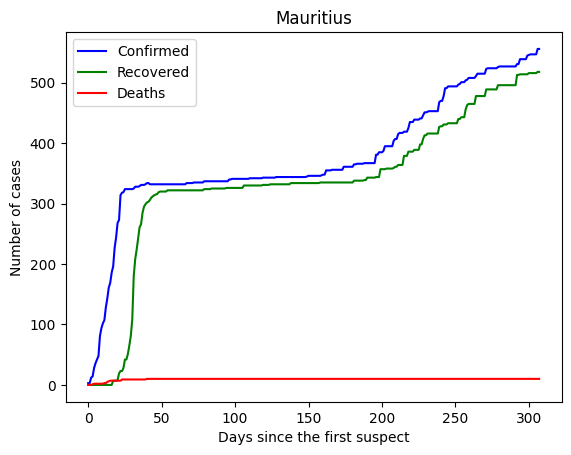

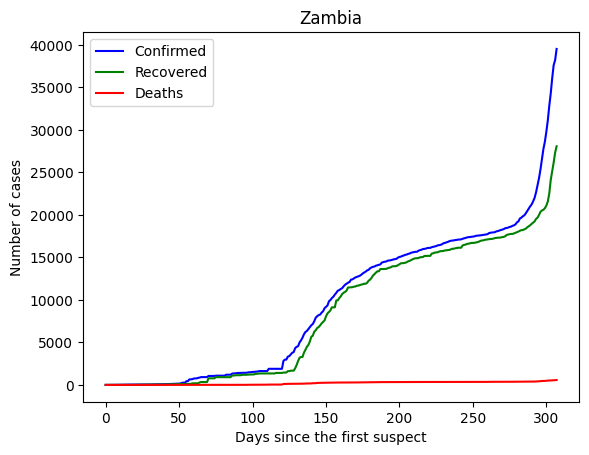

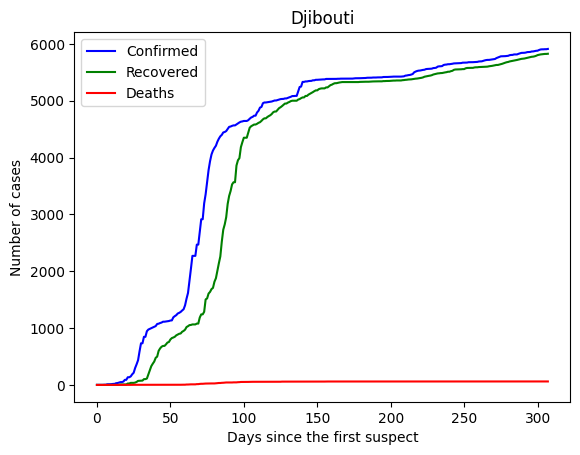

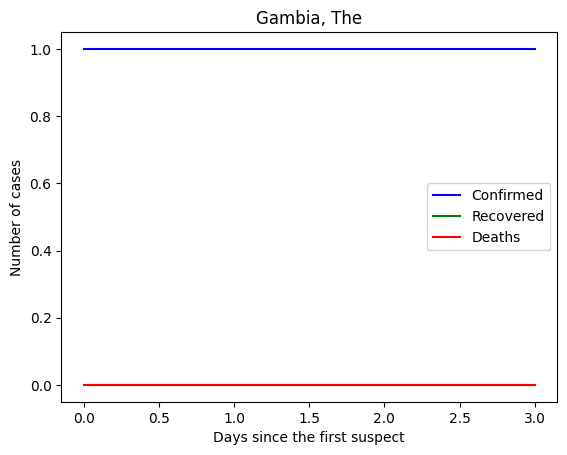

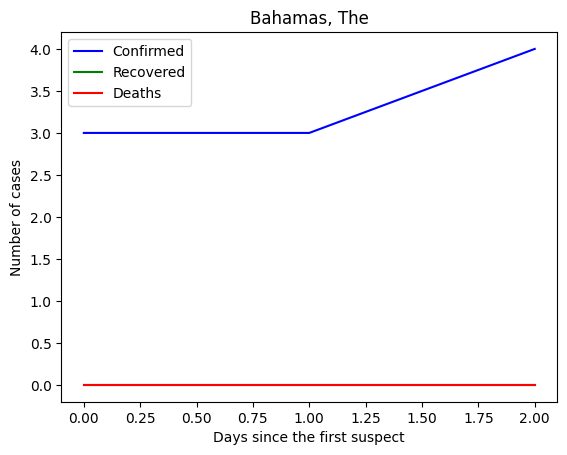

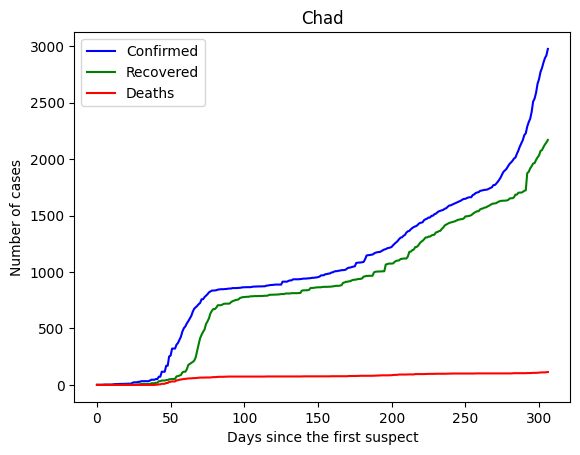

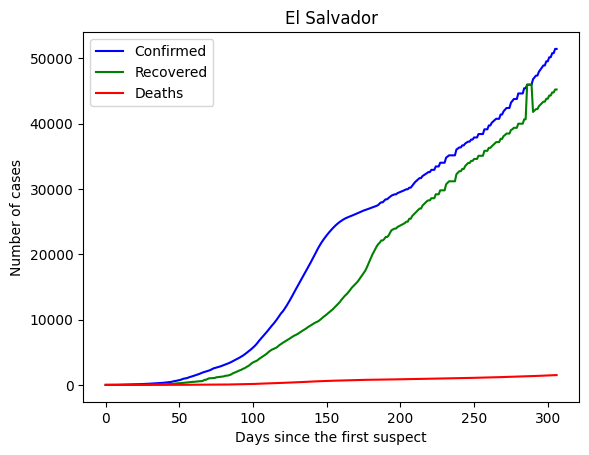

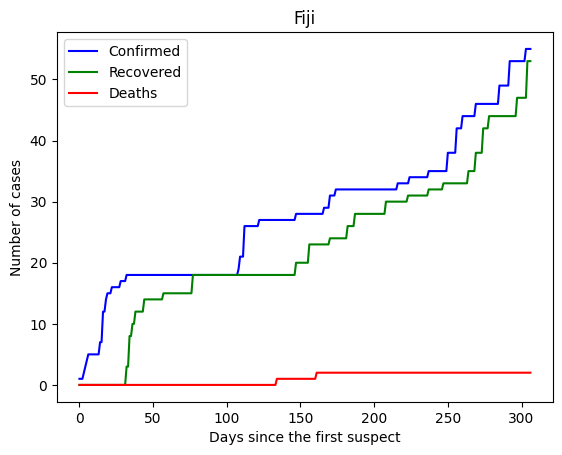

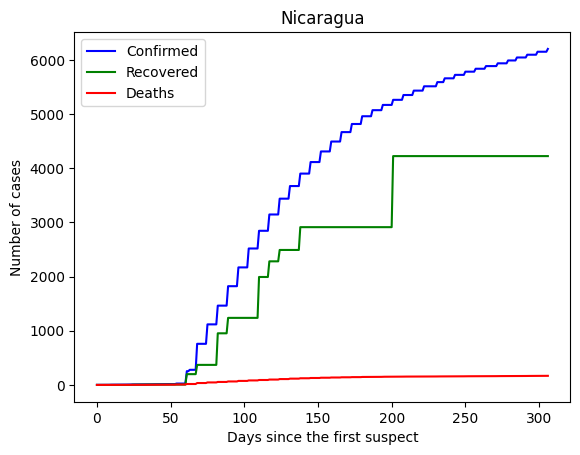

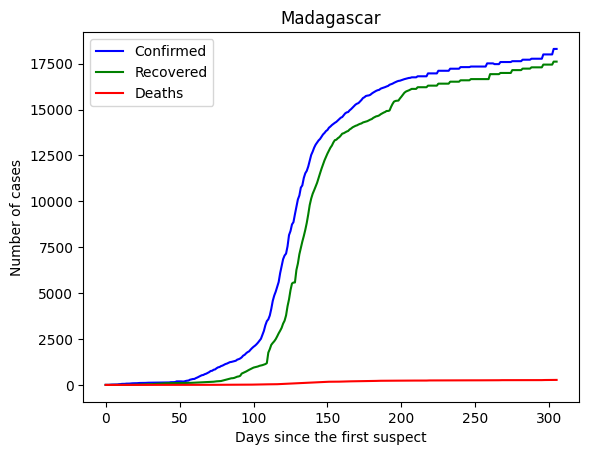

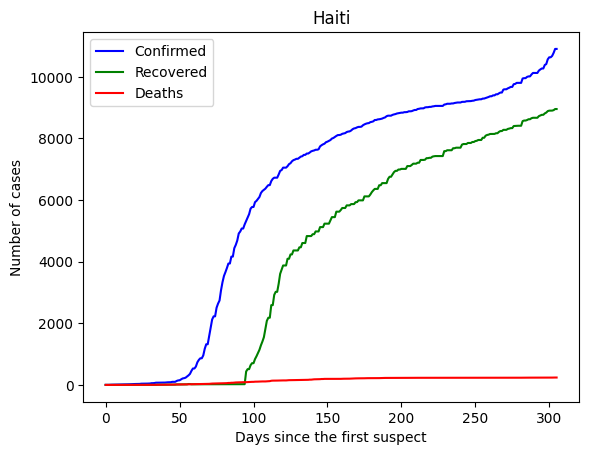

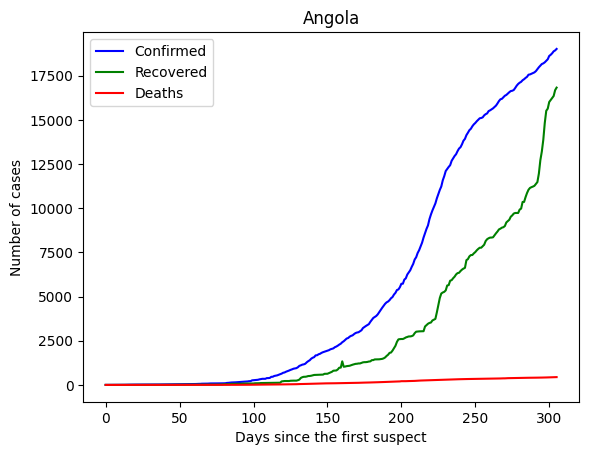

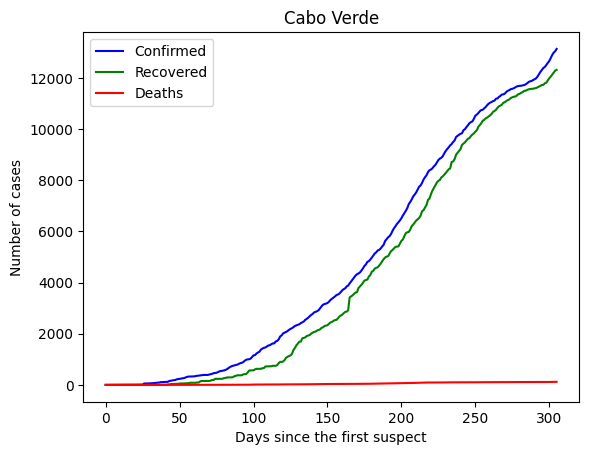

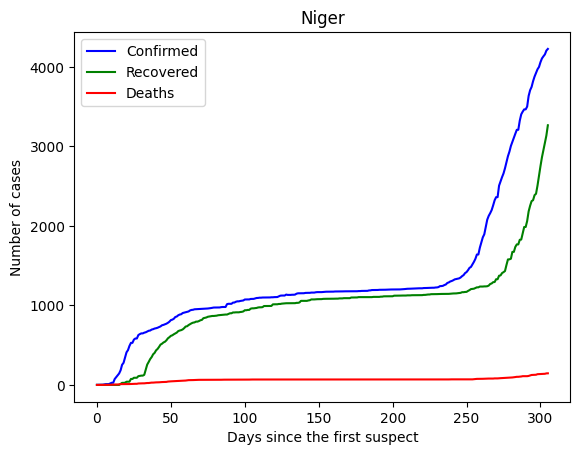

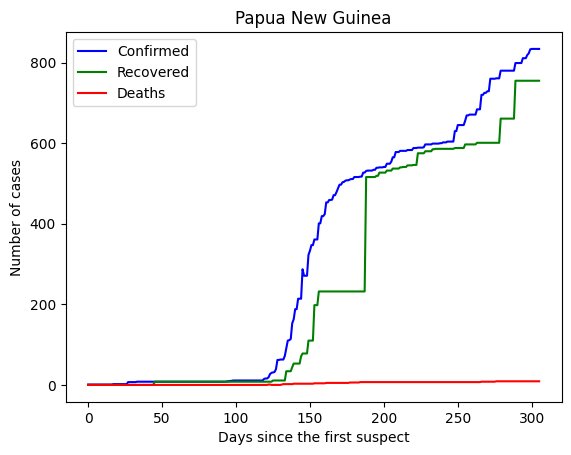

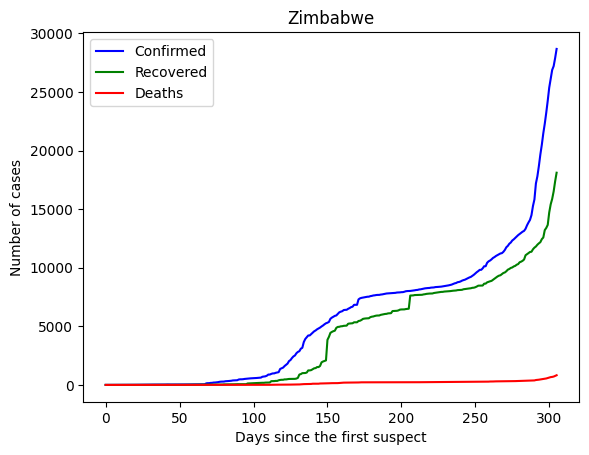

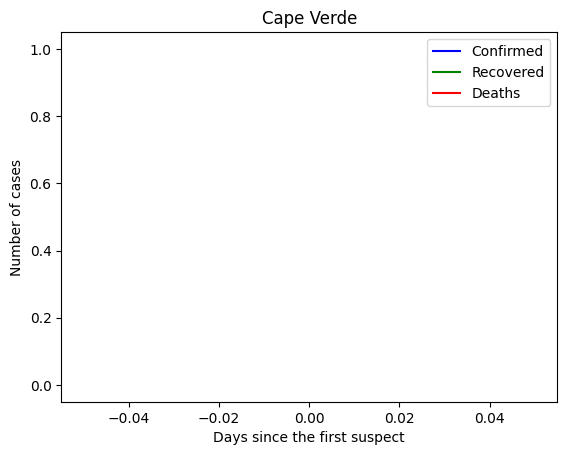

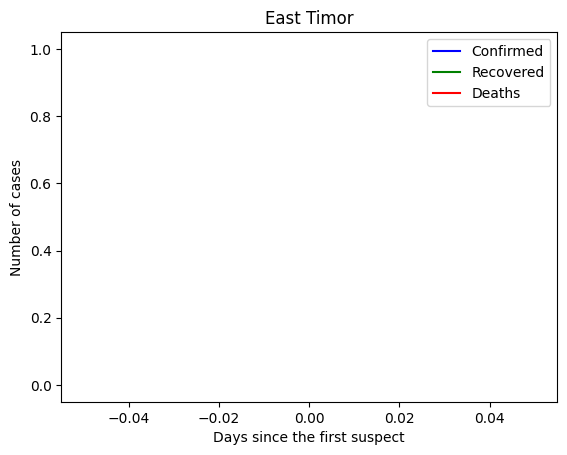

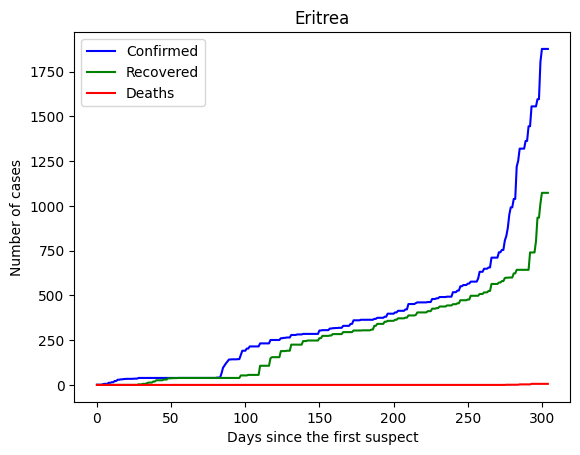

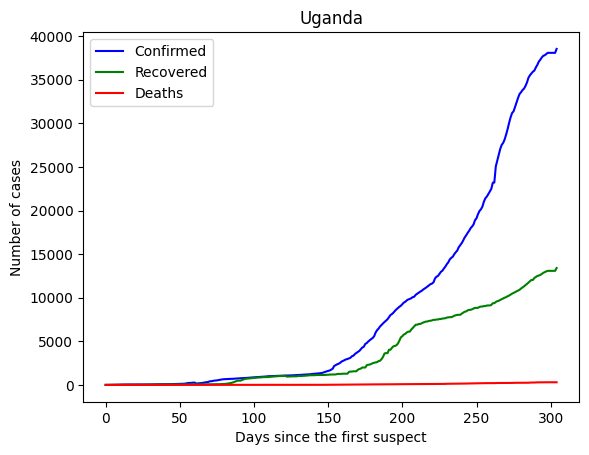

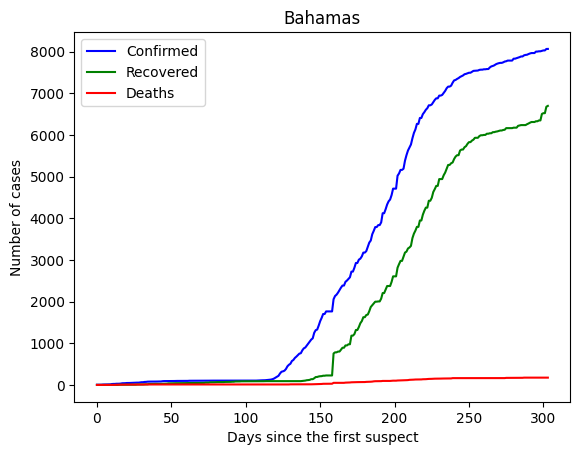

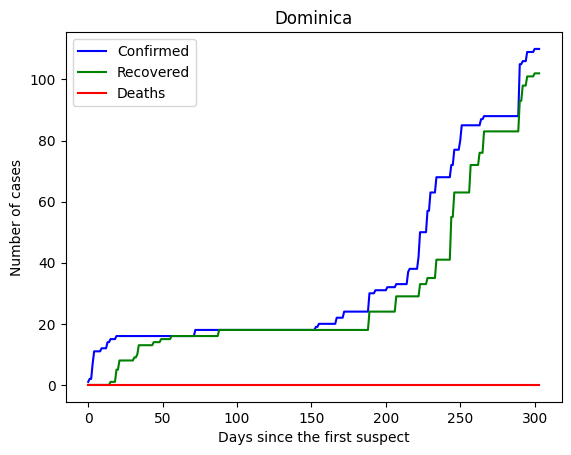

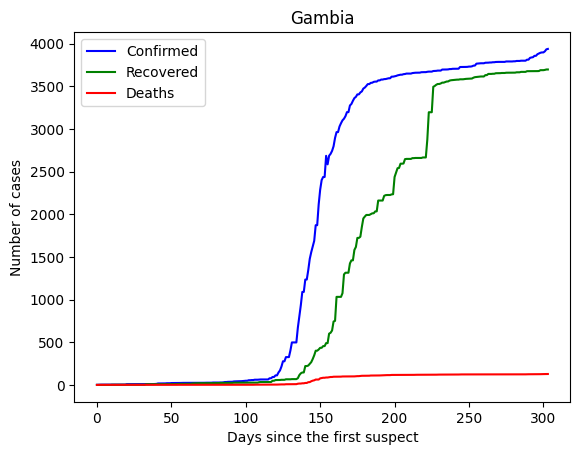

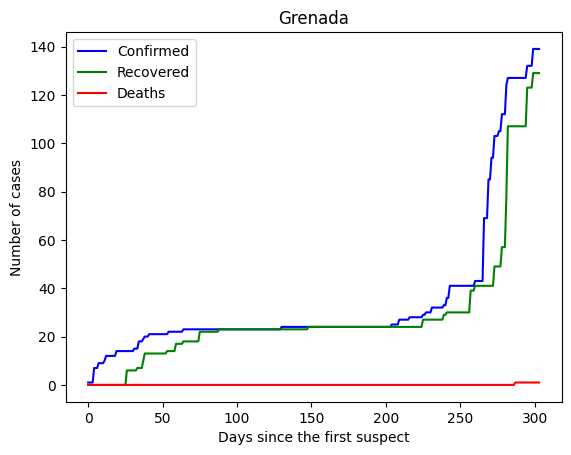

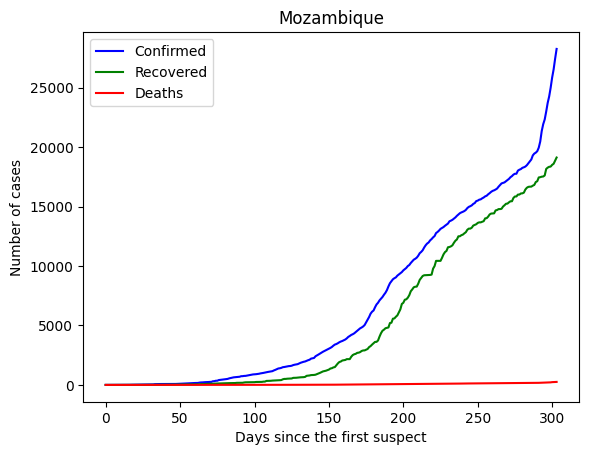

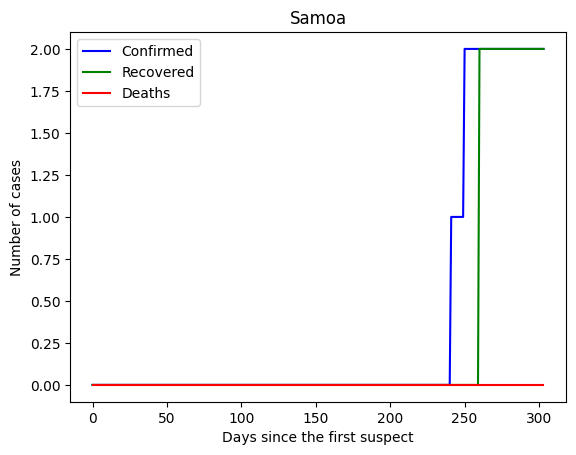

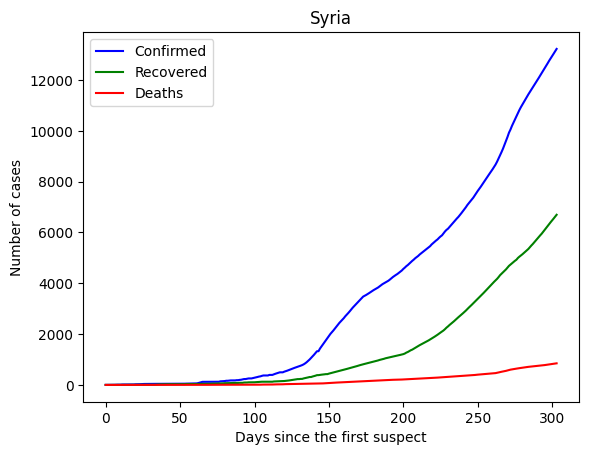

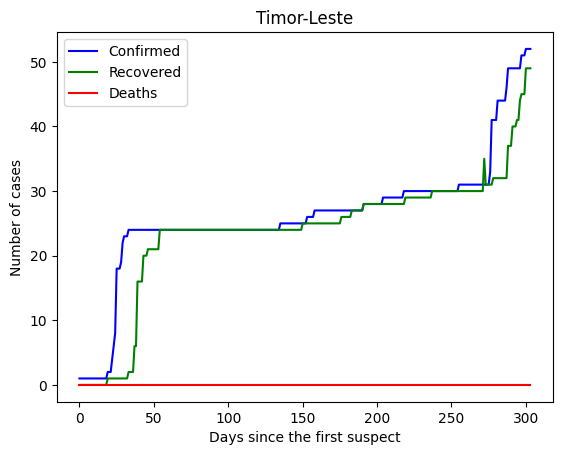

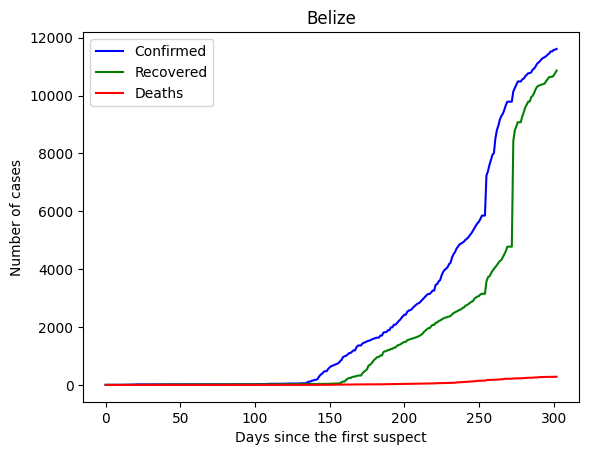

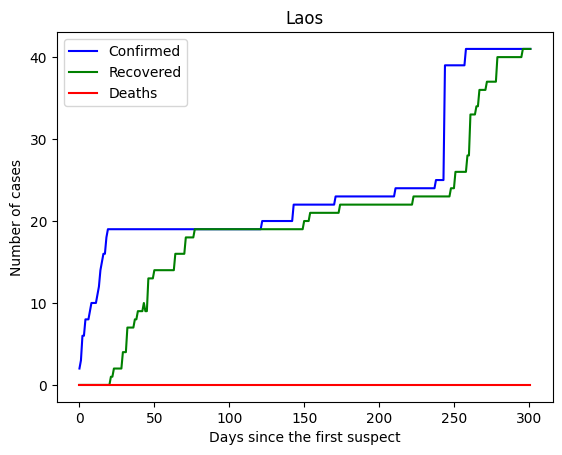

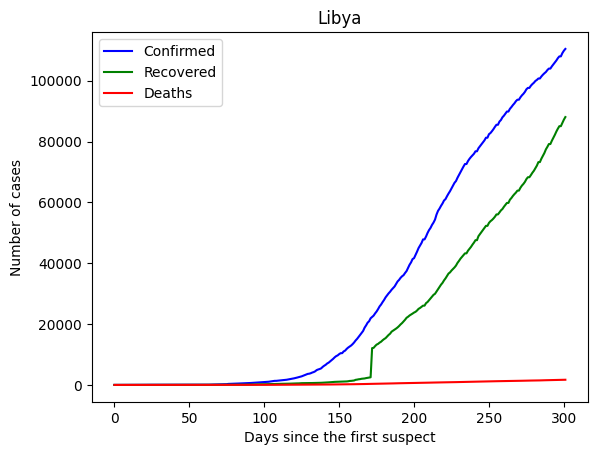

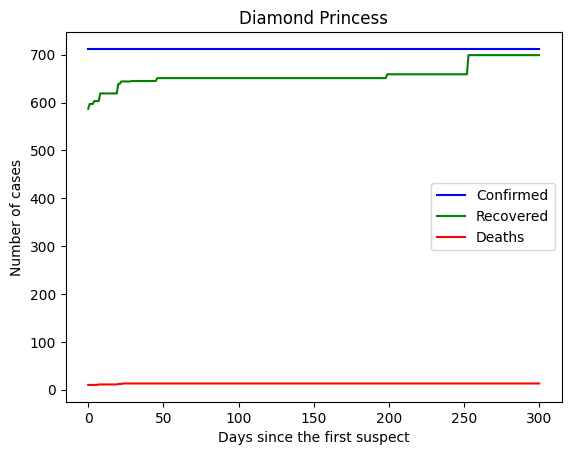

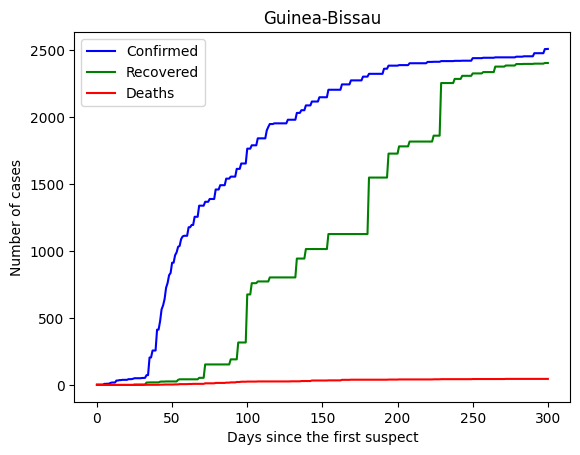

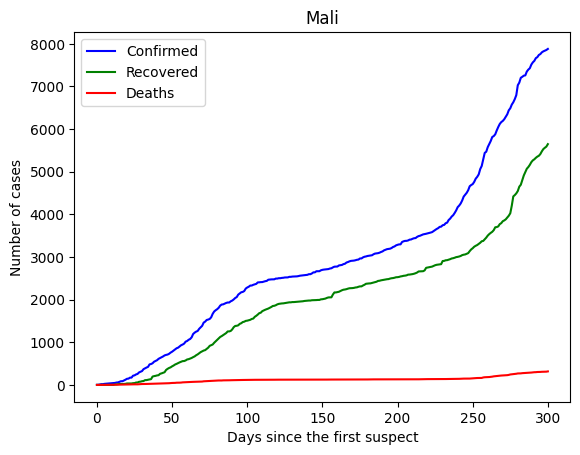

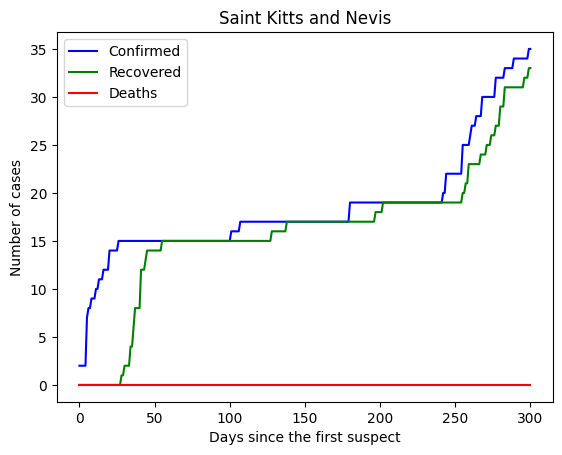

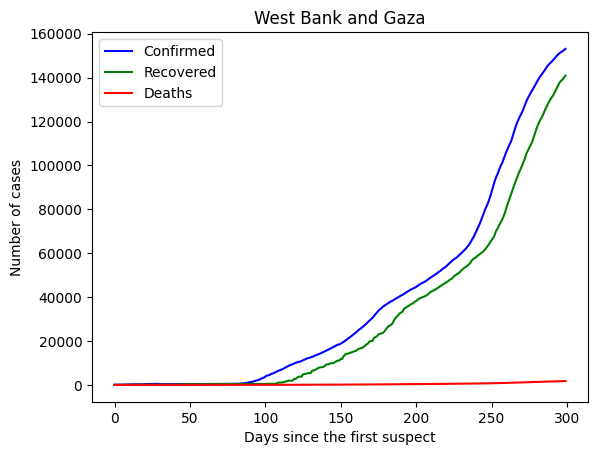

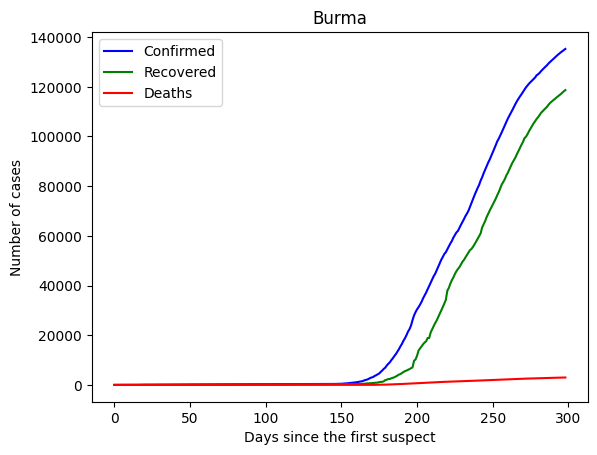

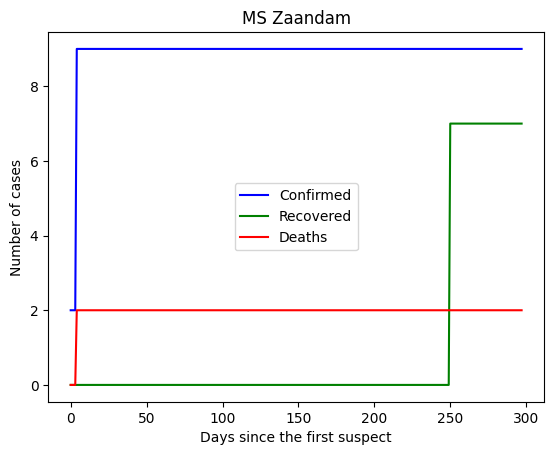

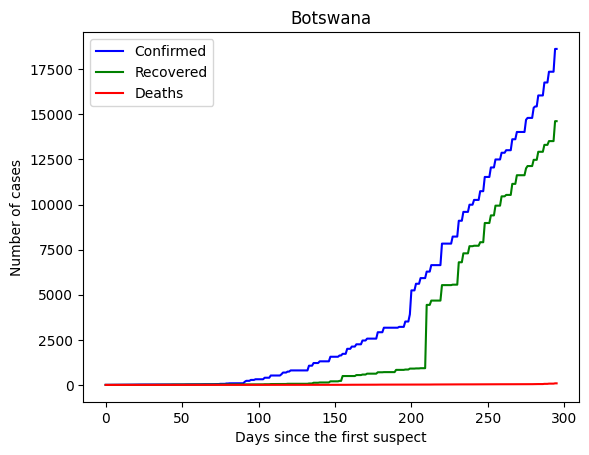

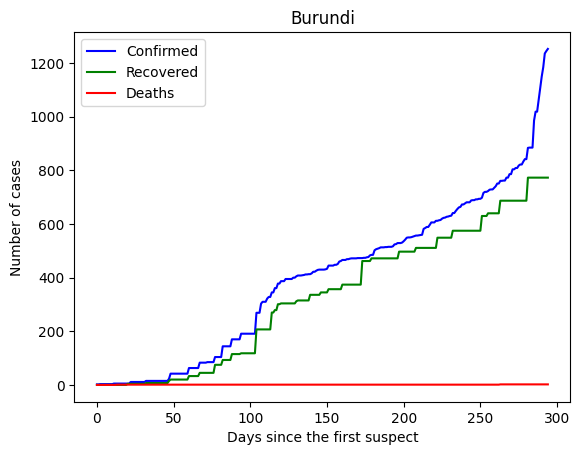

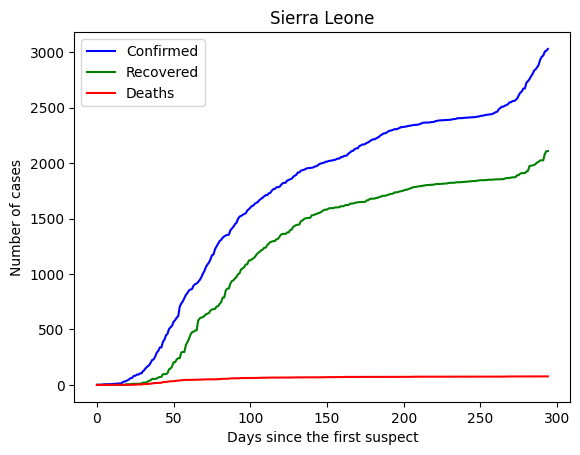

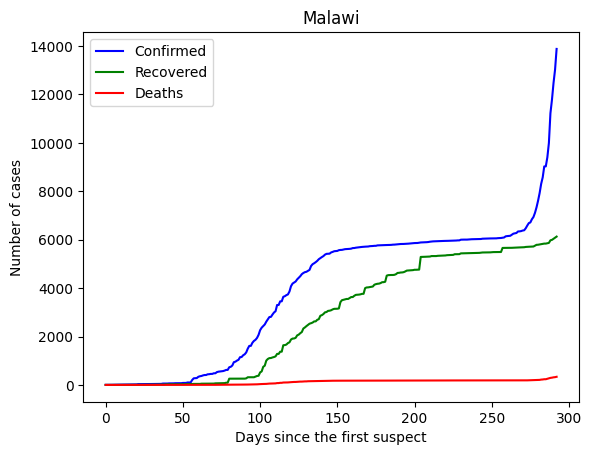

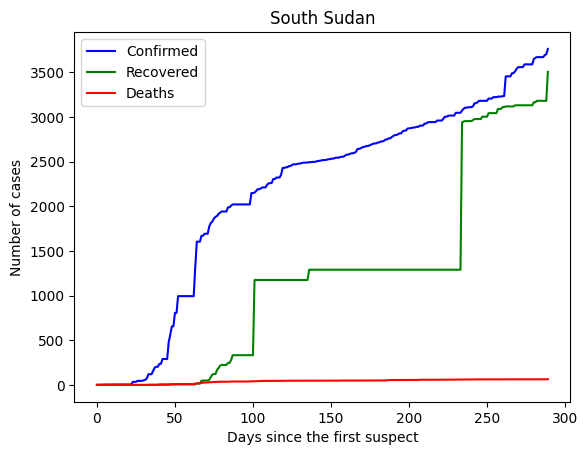

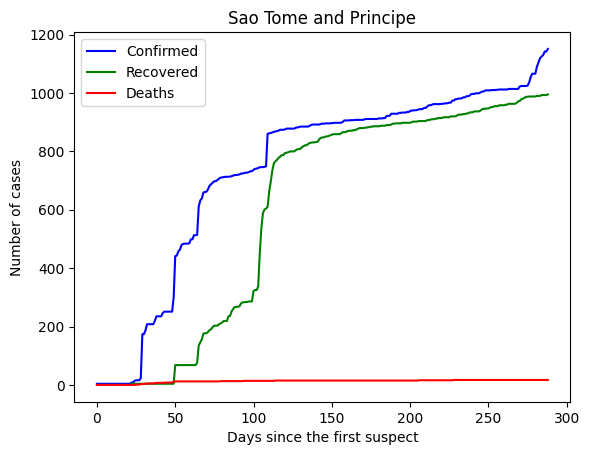

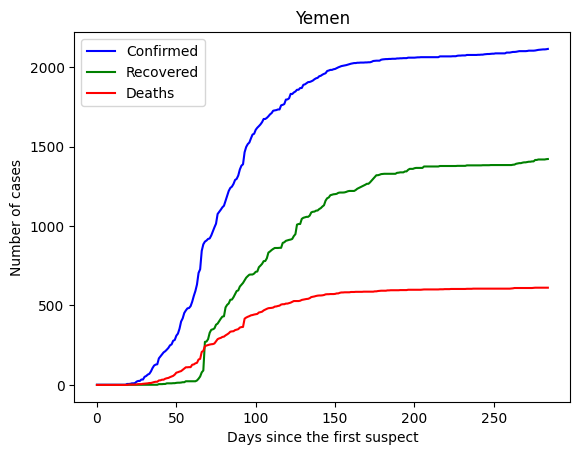

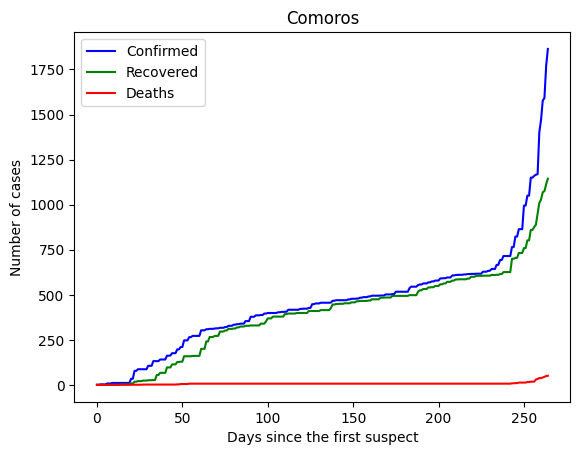

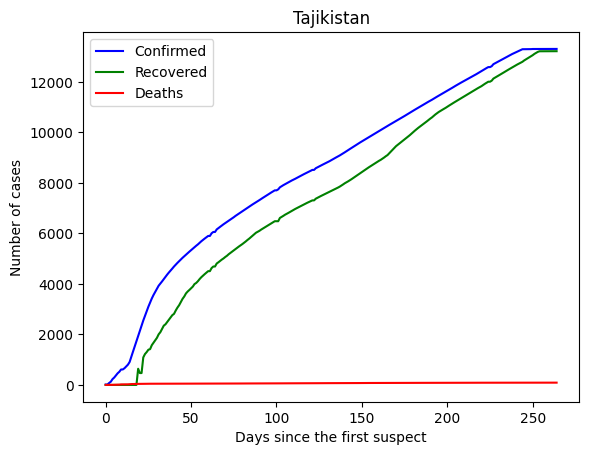

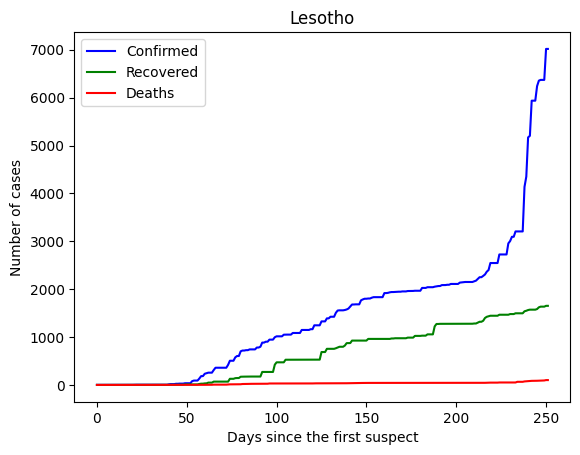

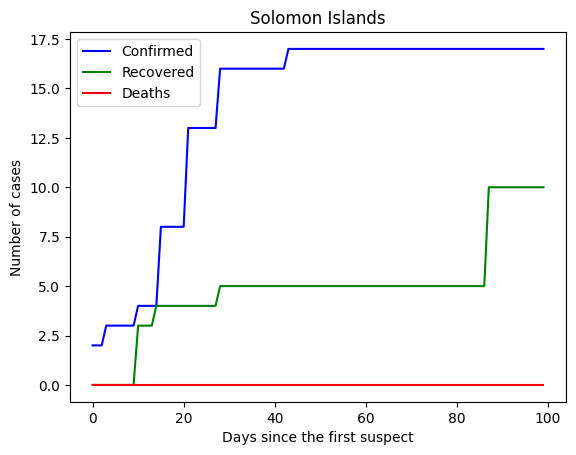

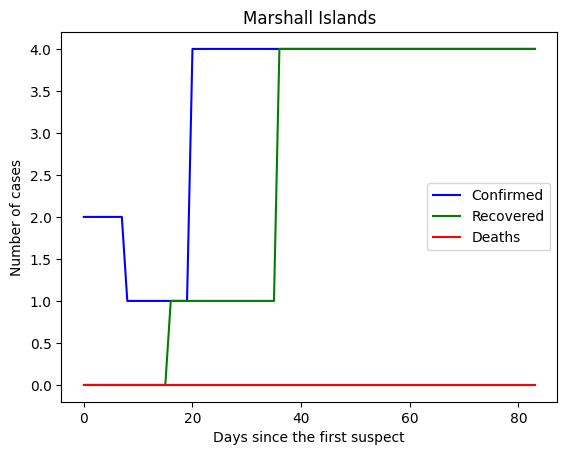

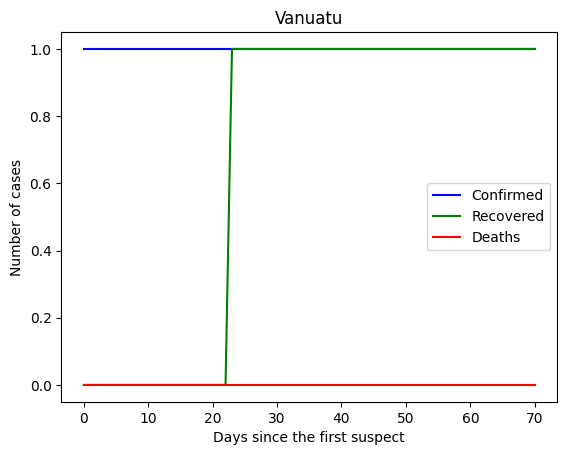

In [55]:
for idx in range(0,len(countries)):
    C = df2[df2['Country']==countries[idx]].reset_index()
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [61]:
df4=df2.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [63]:
C=df4

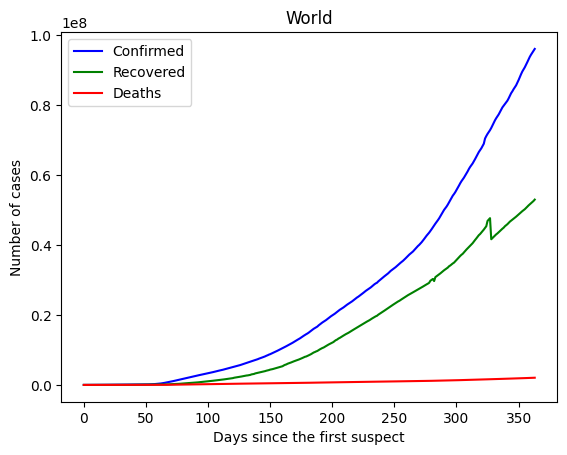

In [69]:
plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()